## Load Steam-200k Dataset and Print Column Names

The code below reads `steam-200k.csv/steam-200k.csv` and prints DataFrame column names line by line.

In [4]:
import pandas as pd
from pathlib import Path

# Path to the CSV file: steam-200k.csv/steam-200k.csv
csv_path = 'F:\KeCheng\steam\steam-200k.csv'
print('Loading:', csv_path)
# low_memory=False avoids dtype inference warnings for large files
df = pd.read_csv(csv_path, low_memory=False)

print('Columns:')
for col in df.columns:
    print(col)

Loading: F:\KeCheng\steam\steam-200k.csv
Columns:
151603712
The Elder Scrolls V Skyrim
purchase
1.0
0


<>:5: SyntaxWarning: invalid escape sequence '\K'
<>:5: SyntaxWarning: invalid escape sequence '\K'
C:\Users\lenovo\AppData\Local\Temp\ipykernel_2784\2738448736.py:5: SyntaxWarning: invalid escape sequence '\K'
  csv_path = 'F:\KeCheng\steam\steam-200k.csv'


In [5]:
# Rename first four columns and delete the last column
# Assume df is already loaded
cols = list(df.columns)
print('Original first four columns:', cols[:4])
# Create rename mapping
rename_map = {
    cols[0]: 'user-id',
    cols[1]: 'game-title',
    cols[2]: 'behavior-name',
    cols[3]: 'value'
}
# Rename and drop last column
df = df.rename(columns=rename_map)
df = df.drop(columns=[cols[-1]])

print('\nModified column names (line by line):')
for c in df.columns:
    print(c)

# Display first 5 rows for verification
df.head()

Original first four columns: ['151603712', 'The Elder Scrolls V Skyrim', 'purchase', '1.0']

Modified column names (line by line):
user-id
game-title
behavior-name
value


user-id                  game-title behavior-name  value
0  151603712  The Elder Scrolls V Skyrim          play  273.0
1  151603712                   Fallout 4      purchase    1.0
2  151603712                   Fallout 4          play   87.0
3  151603712                       Spore      purchase    1.0
4  151603712                       Spore          play   14.9

Number of unique values (user-id): 12393
Total rows: 199999
Average occurrences per value: 16.14

Top 20 most frequent values:
user-id
62990992     1573
33865373      949
11403772      906
30246419      901
47457723      855
58345543      833
22301321      775
49893565      774
138941587     747
64787956      723
33013552      720
53875128      702
20772968      699
24469287      699
76892907      695
36546868      665
11373749      662
48798067      653
86469479      648
116876958     604
Name: count, dtype: int64


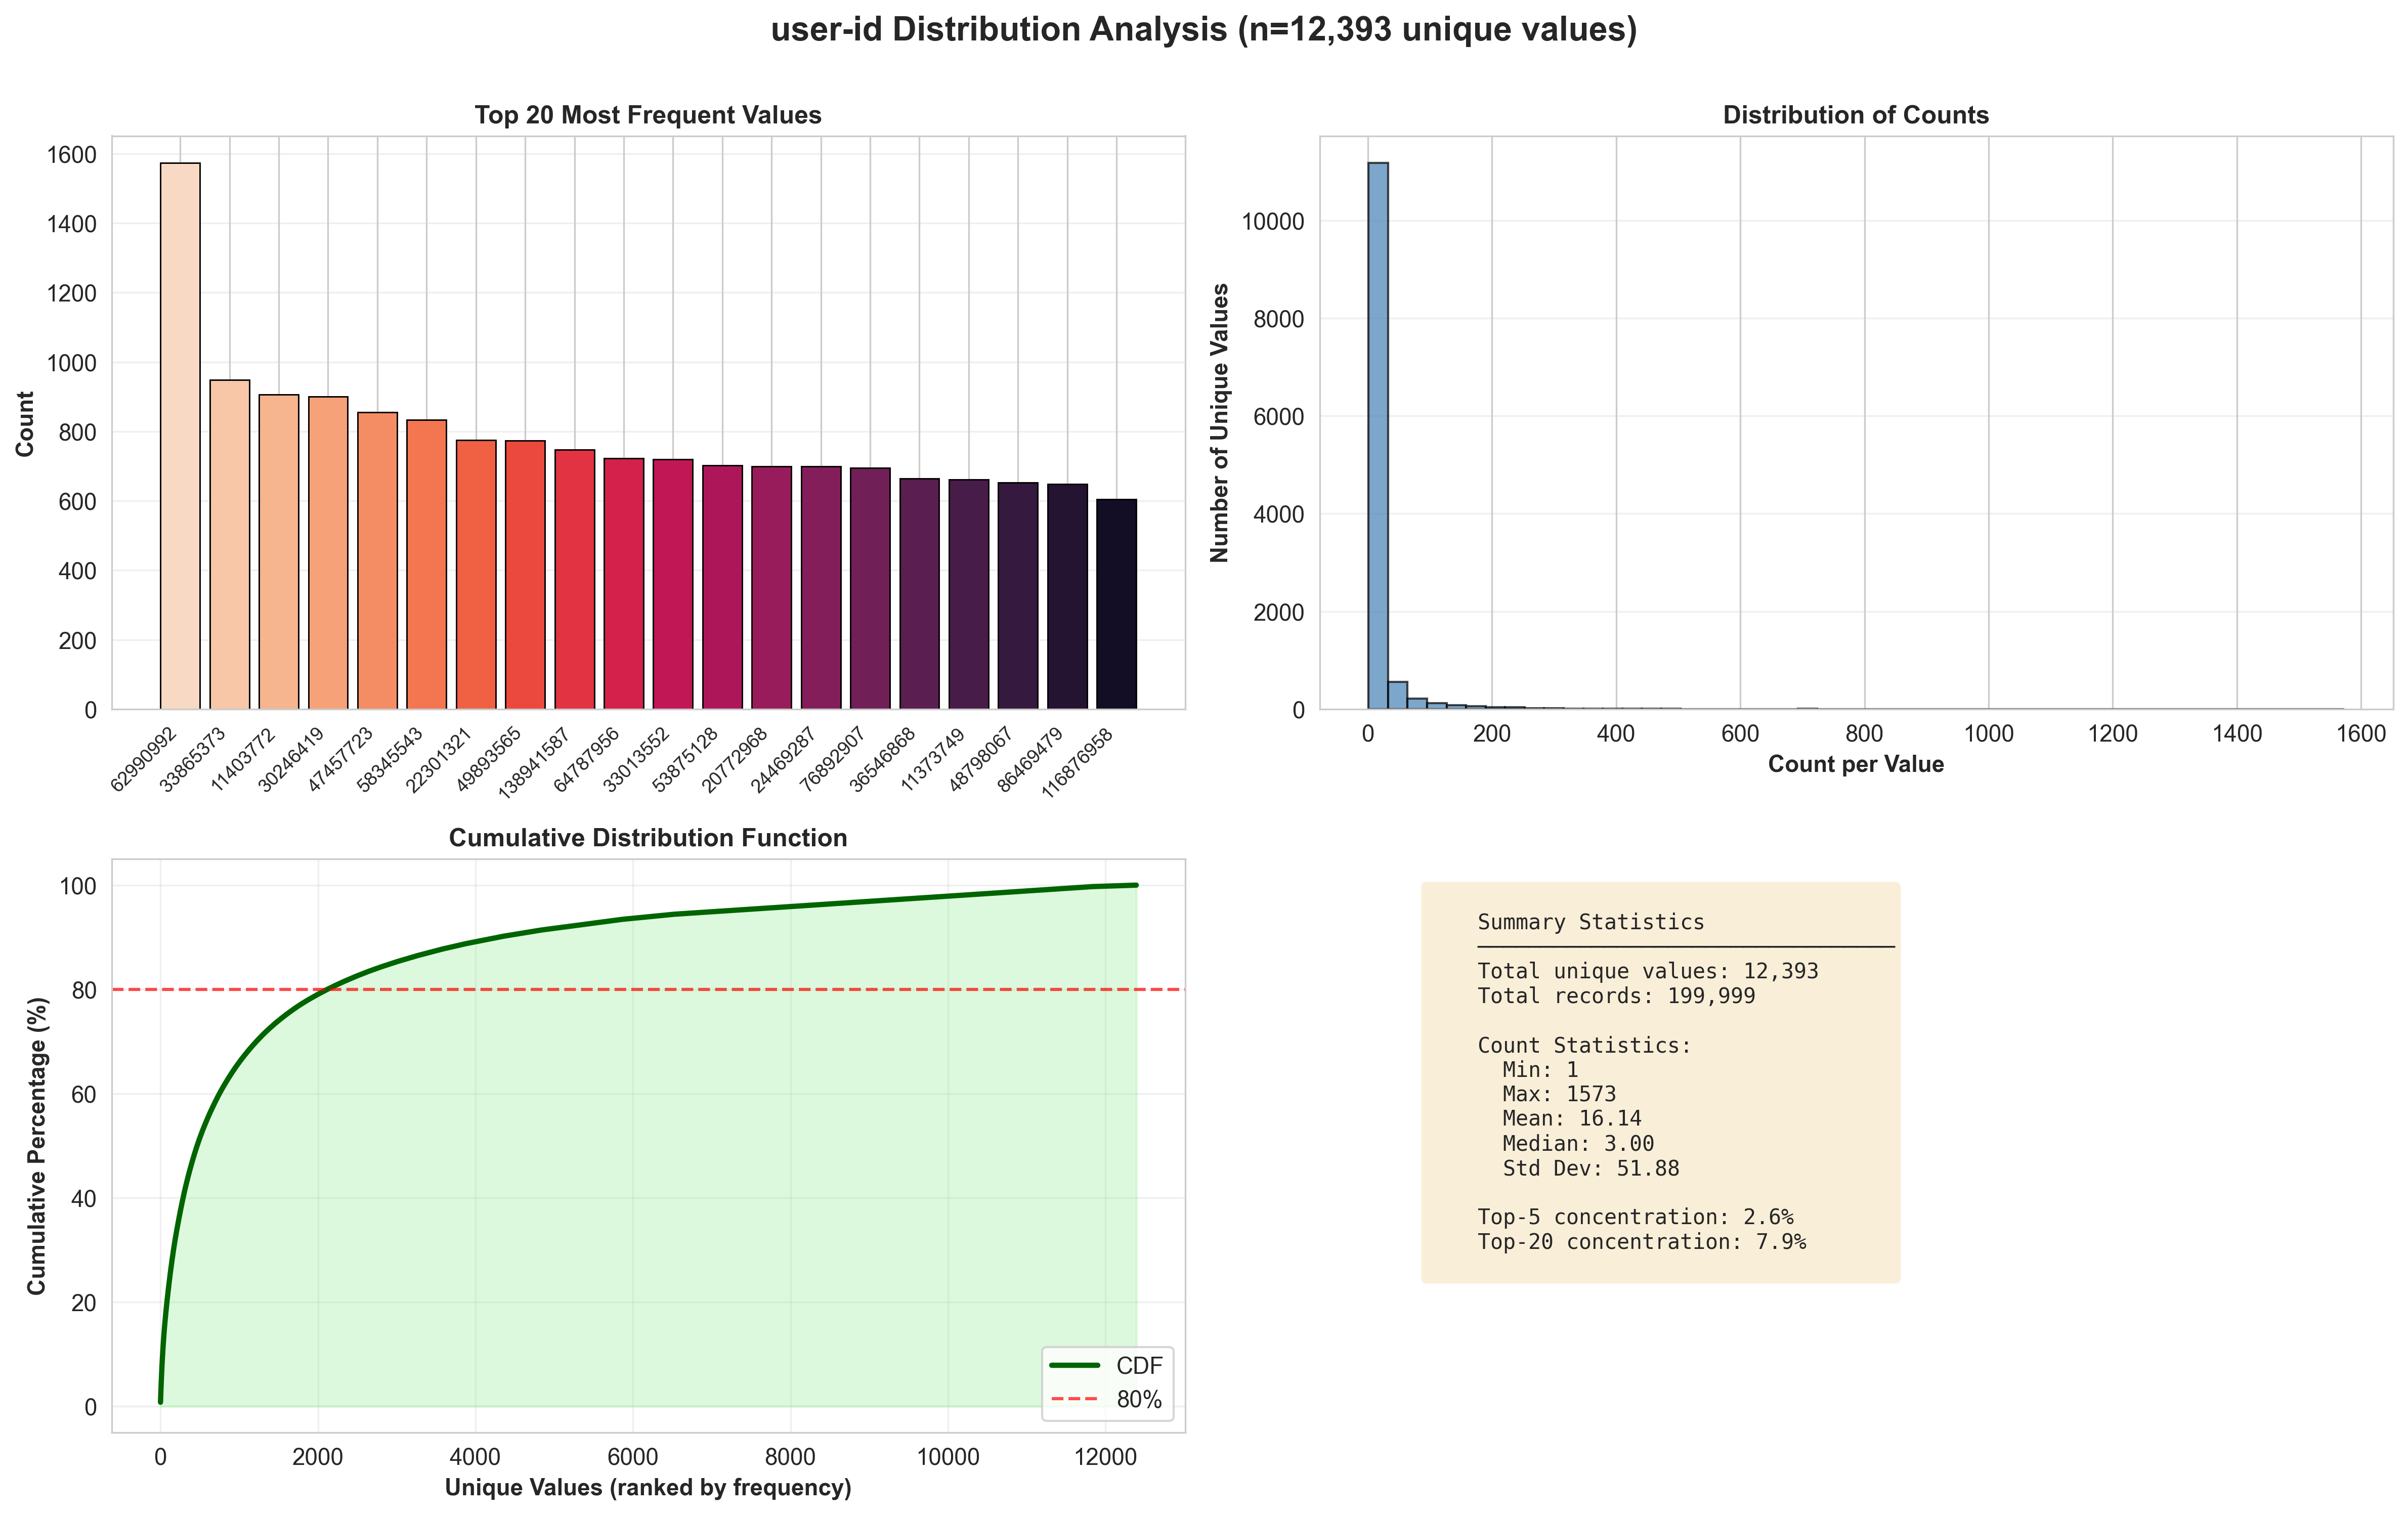


✓ Figure saved as PNG file


In [6]:
# User ID column statistics and publication-quality visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set publication-quality plotting style
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'sans-serif'
sns.set_style('whitegrid')
sns.set_palette('husl')

# Select first column (prefer renamed 'user-id')
if 'user-id' in df.columns:
    user_col = 'user-id'
else:
    user_col = df.columns[0]

unique_count = df[user_col].nunique()
print(f"Number of unique values ({user_col}): {unique_count}")
print(f"Total rows: {len(df)}")
print(f"Average occurrences per value: {len(df)/unique_count:.2f}")

vc = df[user_col].value_counts()
print('\nTop 20 most frequent values:')
print(vc.head(20))

# Publication-quality visualization
if unique_count <= 50:
    # Small dataset: horizontal bar chart for all values
    fig, ax = plt.subplots(figsize=(12, max(6, unique_count*0.3)))
    vc_sorted = vc.sort_values(ascending=True)
    bars = ax.barh(range(len(vc_sorted)), vc_sorted.values, color=sns.color_palette('viridis', len(vc_sorted)))
    ax.set_yticks(range(len(vc_sorted)))
    ax.set_yticklabels(vc_sorted.index)
    ax.set_xlabel('Count', fontsize=12, fontweight='bold')
    ax.set_ylabel(user_col, fontsize=12, fontweight='bold')
    ax.set_title(f'Distribution of {user_col} (n={unique_count})', fontsize=14, fontweight='bold', pad=20)
    ax.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, (idx, val) in enumerate(vc_sorted.items()):
        ax.text(val, i, f' {int(val)}', va='center', fontsize=9)
    
    plt.tight_layout()
    plt.savefig('user_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    # Large dataset: multi-panel publication-quality figure
    fig = plt.figure(figsize=(16, 10))
    
    # 1. Top 20 bar chart
    ax1 = plt.subplot(2, 2, 1)
    top20 = vc.head(20)
    colors1 = sns.color_palette('rocket_r', len(top20))
    bars1 = ax1.bar(range(len(top20)), top20.values, color=colors1, edgecolor='black', linewidth=0.7)
    ax1.set_xticks(range(len(top20)))
    ax1.set_xticklabels(top20.index, rotation=45, ha='right', fontsize=9)
    ax1.set_ylabel('Count', fontsize=11, fontweight='bold')
    ax1.set_title('Top 20 Most Frequent Values', fontsize=12, fontweight='bold')
    ax1.grid(axis='y', alpha=0.3)
    
    # 2. Count distribution histogram
    ax2 = plt.subplot(2, 2, 2)
    counts_log = np.log10(vc.values + 1)
    ax2.hist(vc.values, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    ax2.set_xlabel('Count per Value', fontsize=11, fontweight='bold')
    ax2.set_ylabel('Number of Unique Values', fontsize=11, fontweight='bold')
    ax2.set_title('Distribution of Counts', fontsize=12, fontweight='bold')
    ax2.grid(axis='y', alpha=0.3)
    
    # 3. Cumulative Distribution Function (CDF)
    ax3 = plt.subplot(2, 2, 3)
    sorted_counts = np.sort(vc.values)[::-1]
    cumsum = np.cumsum(sorted_counts)
    cumsum_pct = cumsum / cumsum[-1] * 100
    ax3.plot(range(len(cumsum_pct)), cumsum_pct, linewidth=2.5, color='darkgreen', label='CDF')
    ax3.fill_between(range(len(cumsum_pct)), cumsum_pct, alpha=0.3, color='lightgreen')
    ax3.set_xlabel('Unique Values (ranked by frequency)', fontsize=11, fontweight='bold')
    ax3.set_ylabel('Cumulative Percentage (%)', fontsize=11, fontweight='bold')
    ax3.set_title('Cumulative Distribution Function', fontsize=12, fontweight='bold')
    ax3.grid(alpha=0.3)
    ax3.axhline(y=80, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='80%')
    ax3.legend(loc='lower right')
    
    # 4. Summary statistics panel
    ax4 = plt.subplot(2, 2, 4)
    ax4.axis('off')
    stats_text = f"""
    Summary Statistics
    ─────────────────────────────────
    Total unique values: {unique_count:,}
    Total records: {len(df):,}
    
    Count Statistics:
      Min: {vc.min()}
      Max: {vc.max()}
      Mean: {vc.mean():.2f}
      Median: {vc.median():.2f}
      Std Dev: {vc.std():.2f}
    
    Top-5 concentration: {(vc.head(5).sum()/len(df)*100):.1f}%
    Top-20 concentration: {(vc.head(20).sum()/len(df)*100):.1f}%
    """
    ax4.text(0.1, 0.95, stats_text, transform=ax4.transAxes, 
             fontsize=10, verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    fig.suptitle(f'{user_col} Distribution Analysis (n={unique_count:,} unique values)', 
                 fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout(rect=[0, 0, 1, 0.99])
    plt.savefig('user_distribution_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

print('\n✓ Figure saved as PNG file')

Number of unique games: 5155
Total records: 199999
Average occurrences per game: 38.80

Top 20 most popular games:
game-title
Dota 2                             9682
Team Fortress 2                    4646
Counter-Strike Global Offensive    2789
Unturned                           2632
Left 4 Dead 2                      1752
Counter-Strike Source              1693
Counter-Strike                     1424
Garry's Mod                        1397
The Elder Scrolls V Skyrim         1393
Warframe                           1271
Half-Life 2 Lost Coast             1158
Sid Meier's Civilization V         1150
Robocraft                          1096
Half-Life 2 Deathmatch             1021
Portal                             1005
Portal 2                            997
Half-Life 2                         995
Heroes & Generals                   993
Terraria                            956
Counter-Strike Condition Zero       904
Name: count, dtype: int64

Top 20 game names:
 1. Dota 2 - 9682 occurrence

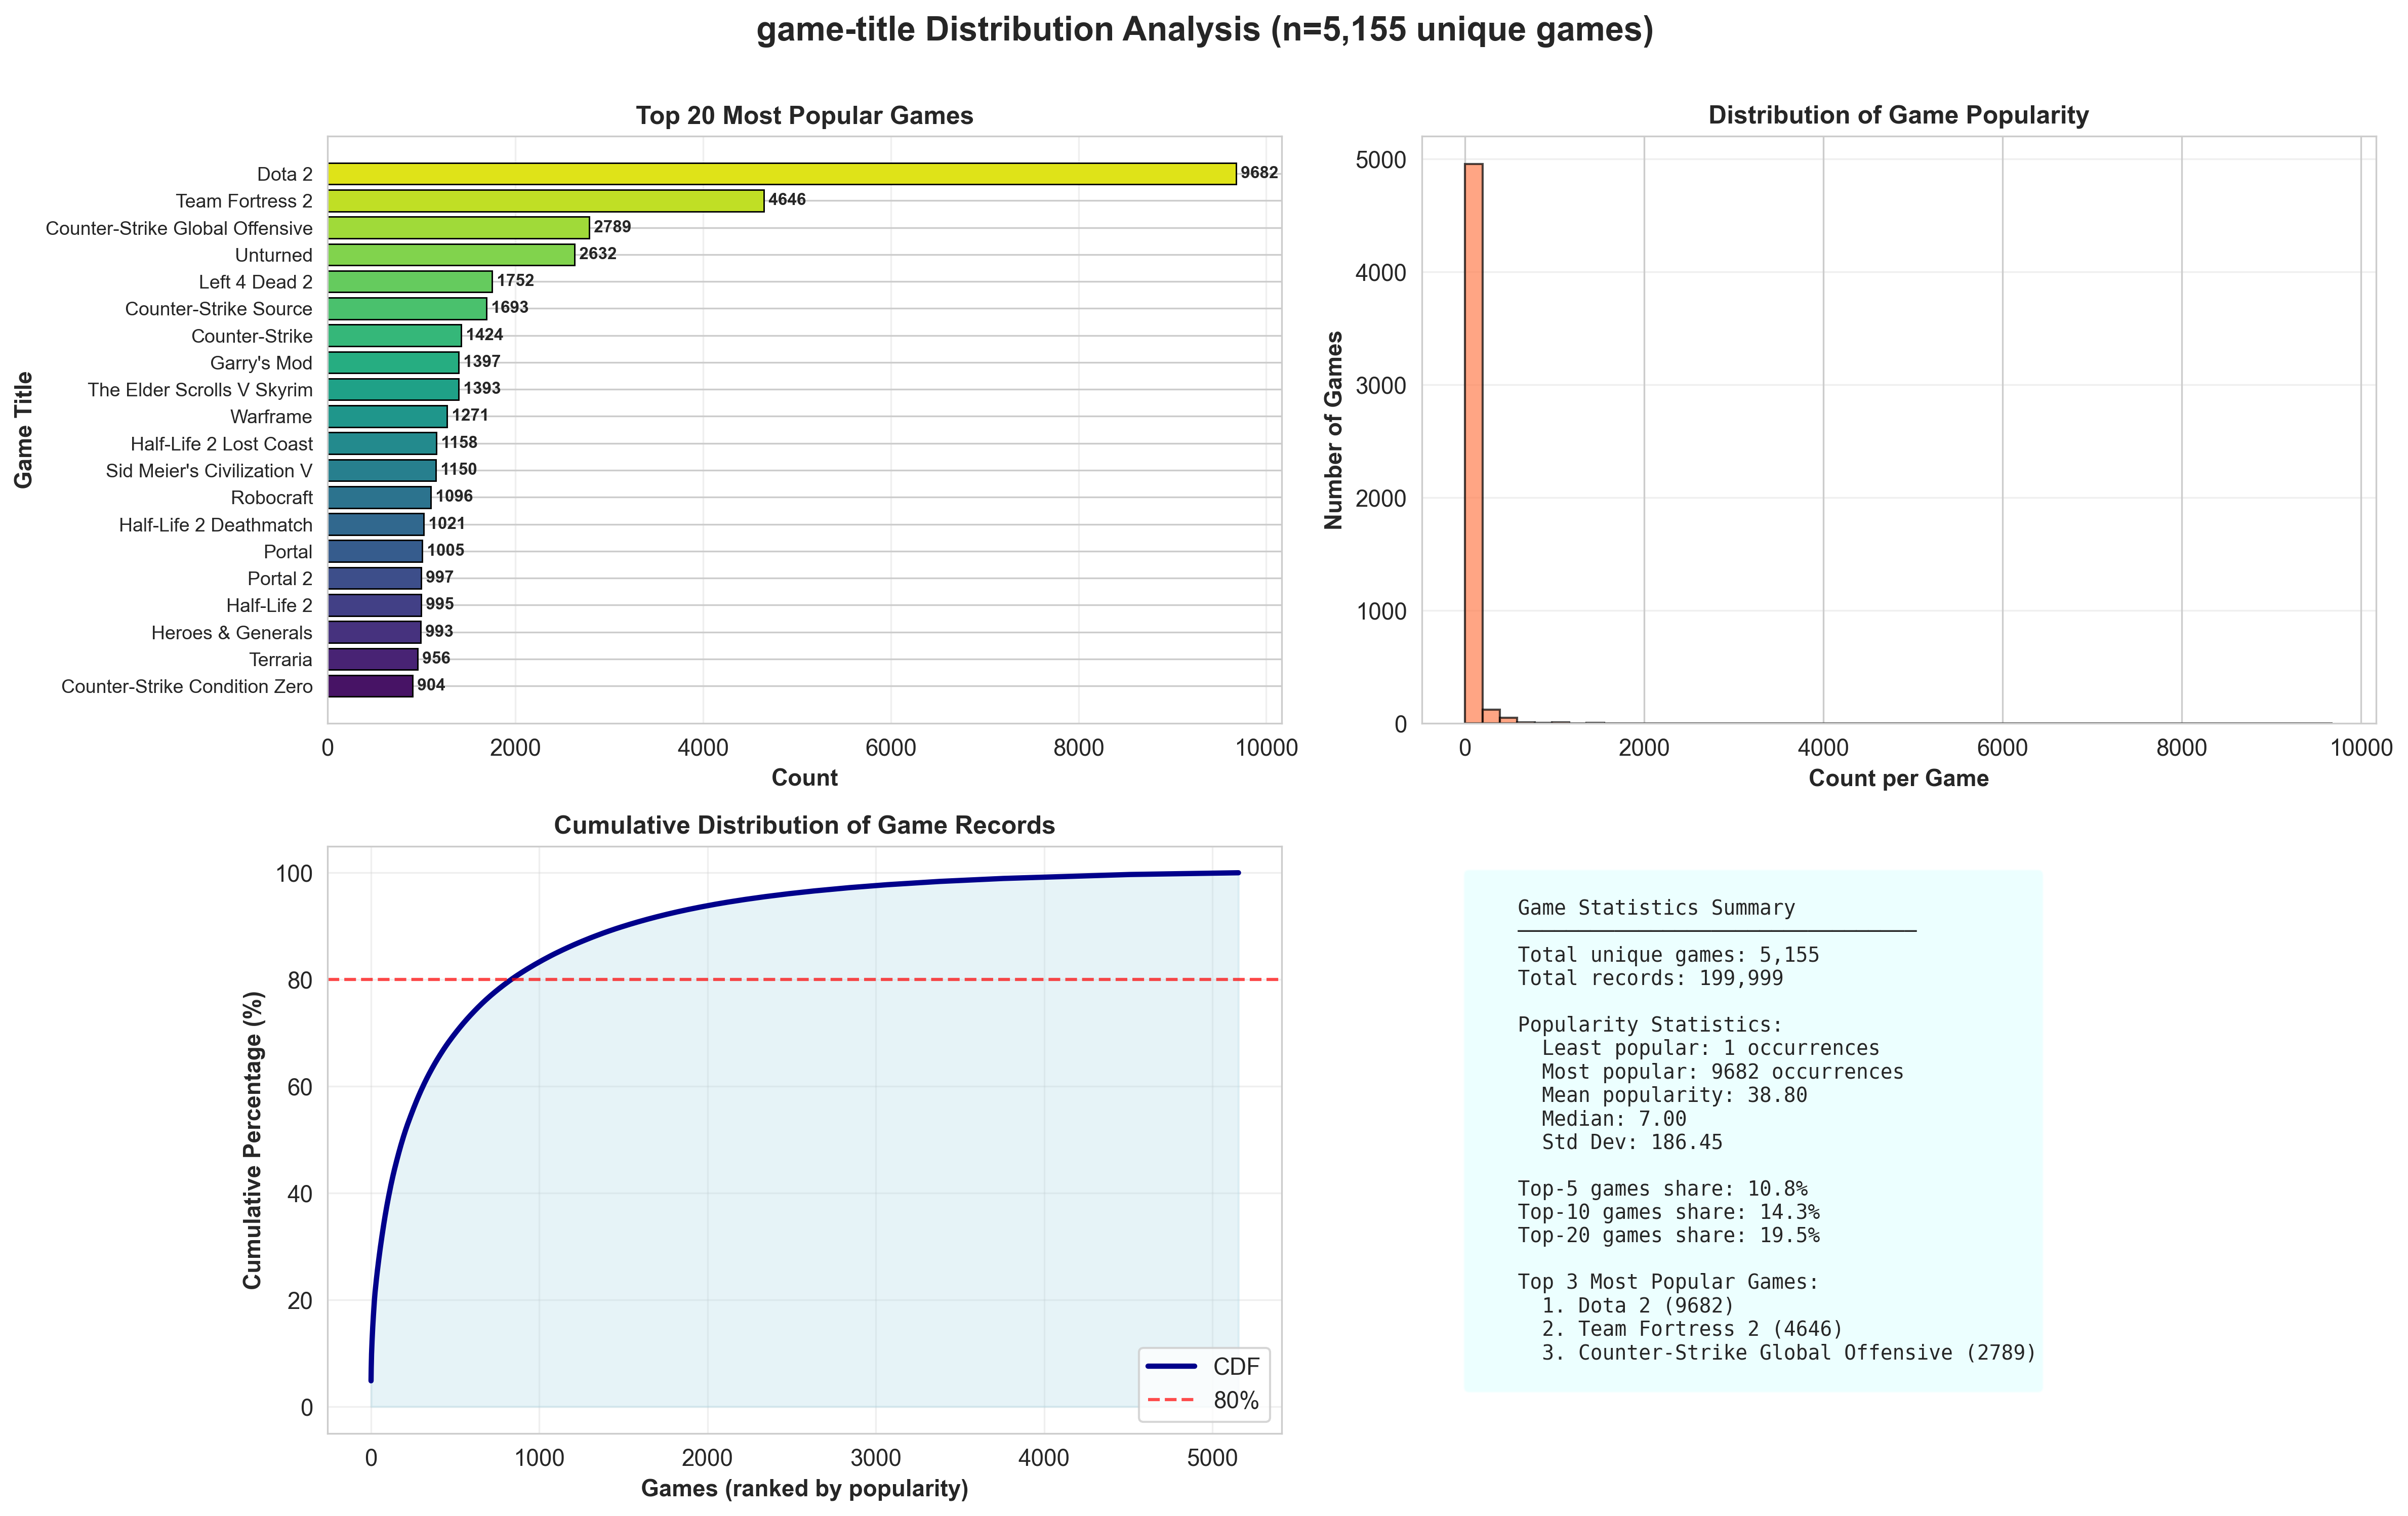


✓ Game statistics and figures generated and saved


In [7]:
# Game title column statistics and publication-quality visualization
game_col = 'game-title'
game_unique_count = df[game_col].nunique()
print(f"Number of unique games: {game_unique_count}")
print(f"Total records: {len(df)}")
print(f"Average occurrences per game: {len(df)/game_unique_count:.2f}")

game_vc = df[game_col].value_counts()
print('\nTop 20 most popular games:')
print(game_vc.head(20))
print('\nTop 20 game names:')
for idx, (game, count) in enumerate(game_vc.head(20).items(), 1):
    print(f"{idx:2d}. {game} - {count} occurrences")

# Publication-quality visualization
if game_unique_count <= 50:
    # Small dataset: horizontal bar chart for all games
    fig, ax = plt.subplots(figsize=(12, max(6, game_unique_count*0.3)))
    game_vc_sorted = game_vc.sort_values(ascending=True)
    bars = ax.barh(range(len(game_vc_sorted)), game_vc_sorted.values, color=sns.color_palette('mako', len(game_vc_sorted)))
    ax.set_yticks(range(len(game_vc_sorted)))
    ax.set_yticklabels(game_vc_sorted.index, fontsize=10)
    ax.set_xlabel('Count', fontsize=12, fontweight='bold')
    ax.set_ylabel(game_col, fontsize=12, fontweight='bold')
    ax.set_title(f'Distribution of {game_col} (n={game_unique_count})', fontsize=14, fontweight='bold', pad=20)
    ax.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, (idx, val) in enumerate(game_vc_sorted.items()):
        ax.text(val, i, f' {int(val)}', va='center', fontsize=9)
    
    plt.tight_layout()
    plt.savefig('game_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    # Large dataset: multi-panel publication-quality figure
    fig = plt.figure(figsize=(16, 10))
    
    # 1. Top 20 games horizontal bar chart with game names on Y-axis
    ax1 = plt.subplot(2, 2, 1)
    top20_games = game_vc.head(20).sort_values(ascending=True)
    colors1 = sns.color_palette('viridis', len(top20_games))
    bars1 = ax1.barh(range(len(top20_games)), top20_games.values, color=colors1, edgecolor='black', linewidth=0.7)
    ax1.set_yticks(range(len(top20_games)))
    ax1.set_yticklabels(top20_games.index, fontsize=9)
    ax1.set_xlabel('Count', fontsize=11, fontweight='bold')
    ax1.set_ylabel('Game Title', fontsize=11, fontweight='bold')
    ax1.set_title('Top 20 Most Popular Games', fontsize=12, fontweight='bold')
    ax1.grid(axis='x', alpha=0.3)
    
    # Add count labels on bars
    for i, (game, count) in enumerate(top20_games.items()):
        ax1.text(count, i, f' {int(count)}', va='center', fontsize=8, fontweight='bold')
    
    # 2. Game popularity distribution histogram
    ax2 = plt.subplot(2, 2, 2)
    ax2.hist(game_vc.values, bins=50, color='coral', edgecolor='black', alpha=0.7)
    ax2.set_xlabel('Count per Game', fontsize=11, fontweight='bold')
    ax2.set_ylabel('Number of Games', fontsize=11, fontweight='bold')
    ax2.set_title('Distribution of Game Popularity', fontsize=12, fontweight='bold')
    ax2.grid(axis='y', alpha=0.3)
    
    # 3. Cumulative Distribution Function (CDF)
    ax3 = plt.subplot(2, 2, 3)
    sorted_game_counts = np.sort(game_vc.values)[::-1]
    cumsum_game = np.cumsum(sorted_game_counts)
    cumsum_game_pct = cumsum_game / cumsum_game[-1] * 100
    ax3.plot(range(len(cumsum_game_pct)), cumsum_game_pct, linewidth=2.5, color='darkblue', label='CDF')
    ax3.fill_between(range(len(cumsum_game_pct)), cumsum_game_pct, alpha=0.3, color='lightblue')
    ax3.set_xlabel('Games (ranked by popularity)', fontsize=11, fontweight='bold')
    ax3.set_ylabel('Cumulative Percentage (%)', fontsize=11, fontweight='bold')
    ax3.set_title('Cumulative Distribution of Game Records', fontsize=12, fontweight='bold')
    ax3.grid(alpha=0.3)
    ax3.axhline(y=80, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='80%')
    ax3.legend(loc='lower right')
    
    # 4. Summary statistics panel
    ax4 = plt.subplot(2, 2, 4)
    ax4.axis('off')
    game_stats_text = f"""
    Game Statistics Summary
    ─────────────────────────────────
    Total unique games: {game_unique_count:,}
    Total records: {len(df):,}
    
    Popularity Statistics:
      Least popular: {game_vc.min()} occurrences
      Most popular: {game_vc.max()} occurrences
      Mean popularity: {game_vc.mean():.2f}
      Median: {game_vc.median():.2f}
      Std Dev: {game_vc.std():.2f}
    
    Top-5 games share: {(game_vc.head(5).sum()/len(df)*100):.1f}%
    Top-10 games share: {(game_vc.head(10).sum()/len(df)*100):.1f}%
    Top-20 games share: {(game_vc.head(20).sum()/len(df)*100):.1f}%
    
    Top 3 Most Popular Games:
      1. {game_vc.index[0]} ({game_vc.values[0]})
      2. {game_vc.index[1]} ({game_vc.values[1]})
      3. {game_vc.index[2]} ({game_vc.values[2]})
    """
    ax4.text(0.05, 0.95, game_stats_text, transform=ax4.transAxes, 
             fontsize=9.5, verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle='round', facecolor='lightcyan', alpha=0.6))
    
    fig.suptitle(f'{game_col} Distribution Analysis (n={game_unique_count:,} unique games)', 
                 fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout(rect=[0, 0, 1, 0.99])
    plt.savefig('game_distribution_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

print('\n✓ Game statistics and figures generated and saved')

In [8]:
df.head(5)  # Display first few rows of the modified DataFrame

user-id                  game-title behavior-name  value
0  151603712  The Elder Scrolls V Skyrim          play  273.0
1  151603712                   Fallout 4      purchase    1.0
2  151603712                   Fallout 4          play   87.0
3  151603712                       Spore      purchase    1.0
4  151603712                       Spore          play   14.9

In [9]:
## Data Cleaning and Preprocessing
# Filter for 'play' behavior only
print("=" * 60)
print("Step 1: Filter for 'play' behavior")
print("=" * 60)
print(f"Original dataset size: {len(df)}")
print(f"Unique behaviors: {df['behavior-name'].unique()}")

df_play = df[df['behavior-name'] == 'play'].copy()
print(f"After filtering for 'play': {len(df_play)} records")

# Convert 'value' column to numeric, handling anomalies
print("\n" + "=" * 60)
print("Step 2: Data type conversion and anomaly handling")
print("=" * 60)
print(f"Value column dtype: {df_play['value'].dtype}")
print(f"Sample values: {df_play['value'].head(10).tolist()}")

# Convert to numeric, coerce errors to NaN
df_play['value'] = pd.to_numeric(df_play['value'], errors='coerce')
print(f"After conversion - NaN count: {df_play['value'].isna().sum()}")

# Remove rows with NaN values
df_play = df_play.dropna(subset=['value'])
print(f"After removing NaN: {len(df_play)} records")

# Remove anomalies (negative or zero play hours)
df_play = df_play[df_play['value'] > 0].copy()
print(f"After removing non-positive values: {len(df_play)} records")

print(f"\nPlay hours statistics:")
print(df_play['value'].describe())

# User and game filtering (≥5 records)
print("\n" + "=" * 60)
print("Step 3: User and Game Filtering (≥5 records)")
print("=" * 60)

initial_users = df_play['user-id'].nunique()
initial_games = df_play['game-title'].nunique()
print(f"Before filtering - Users: {initial_users}, Games: {initial_games}")

# Filter users with ≥5 records
user_counts = df_play['user-id'].value_counts()
valid_users = user_counts[user_counts >= 5].index
df_play = df_play[df_play['user-id'].isin(valid_users)].copy()

# Filter games with ≥5 records
game_counts = df_play['game-title'].value_counts()
valid_games = game_counts[game_counts >= 5].index
df_play = df_play[df_play['game-title'].isin(valid_games)].copy()

final_users = df_play['user-id'].nunique()
final_games = df_play['game-title'].nunique()
print(f"After filtering - Users: {final_users}, Games: {final_games}")
print(f"Removed {initial_users - final_users} users and {initial_games - final_games} games")
print(f"Final dataset size: {len(df_play)} records")


Step 1: Filter for 'play' behavior
Original dataset size: 199999
Unique behaviors: ['play' 'purchase']
After filtering for 'play': 70489 records

Step 2: Data type conversion and anomaly handling
Value column dtype: float64
Sample values: [273.0, 87.0, 14.9, 12.1, 8.9, 8.5, 8.1, 7.5, 3.3, 2.8]
After conversion - NaN count: 0
After removing NaN: 70489 records
After removing non-positive values: 70489 records

Play hours statistics:
count    70489.000000
mean        48.878063
std        229.335236
min          0.100000
25%          1.000000
50%          4.500000
75%         19.100000
max      11754.000000
Name: value, dtype: float64

Step 3: User and Game Filtering (≥5 records)
Before filtering - Users: 11350, Games: 3600
After filtering - Users: 2435, Games: 1524
Removed 8915 users and 2076 games
Final dataset size: 54017 records


In [10]:
## Build User-Item Matrix
print("\n" + "=" * 60)
print("Step 4: Build User-Item Matrix")
print("=" * 60)

# Create user-item matrix (rows: users, columns: games, values: play hours)
user_item_matrix = df_play.pivot_table(
    index='user-id',
    columns='game-title',
    values='value',
    aggfunc='sum',
    fill_value=0
)

print(f"User-Item Matrix shape: {user_item_matrix.shape}")
print(f"Users: {user_item_matrix.shape[0]}, Games: {user_item_matrix.shape[1]}")
print(f"\nMatrix statistics:")
print(user_item_matrix.describe().T.head(10))

# Calculate sparsity
total_elements = user_item_matrix.shape[0] * user_item_matrix.shape[1]
zero_elements = (user_item_matrix == 0).sum().sum()
sparsity = zero_elements / total_elements * 100

print(f"\n" + "=" * 60)
print("Data Sparsity Analysis")
print("=" * 60)
print(f"Total matrix elements: {total_elements:,}")
print(f"Non-zero elements: {total_elements - zero_elements:,}")
print(f"Zero elements: {zero_elements:,}")
print(f"Data Sparsity Rate: {sparsity:.2f}%")
print(f"Data Density Rate: {100 - sparsity:.2f}%")



Step 4: Build User-Item Matrix
User-Item Matrix shape: (2435, 1524)
Users: 2435, Games: 1524

Matrix statistics:
                                                     count      mean  \
game-title                                                             
1... 2... 3... KICK IT! (Drop That Beat Like an...  2435.0  0.008214   
100% Orange Juice                                   2435.0  0.017782   
12 Labours of Hercules                              2435.0  0.014251   
12 Labours of Hercules II The Cretan Bull           2435.0  0.014086   
140                                                 2435.0  0.002587   
3DMark                                              2435.0  0.098891   
404Sight                                            2435.0  0.001273   
60 Seconds!                                         2435.0  0.003819   
7 Days to Die                                       2435.0  1.482341   
8BitBoy                                             2435.0  0.011088   

                     

# Exploratory Data Analysis (EDA)


Top 20 Most Played Games

Top 20 Most Played Games (by total hours):
                                             Total Hours  Player Count  \
game-title                                                               
Dota 2                                          373034.6           926   
Counter-Strike Global Offensive                 259751.4           938   
Team Fortress 2                                 114525.0          1181   
Counter-Strike Source                            77208.5           450   
Counter-Strike                                   75982.4           283   
The Elder Scrolls V Skyrim                       59415.5           562   
Sid Meier's Civilization V                       49733.7           389   
Garry's Mod                                      47301.6           588   
Call of Duty Modern Warfare 2 - Multiplayer      29446.1           208   
Left 4 Dead 2                                    28787.1           665   
Terraria                                  

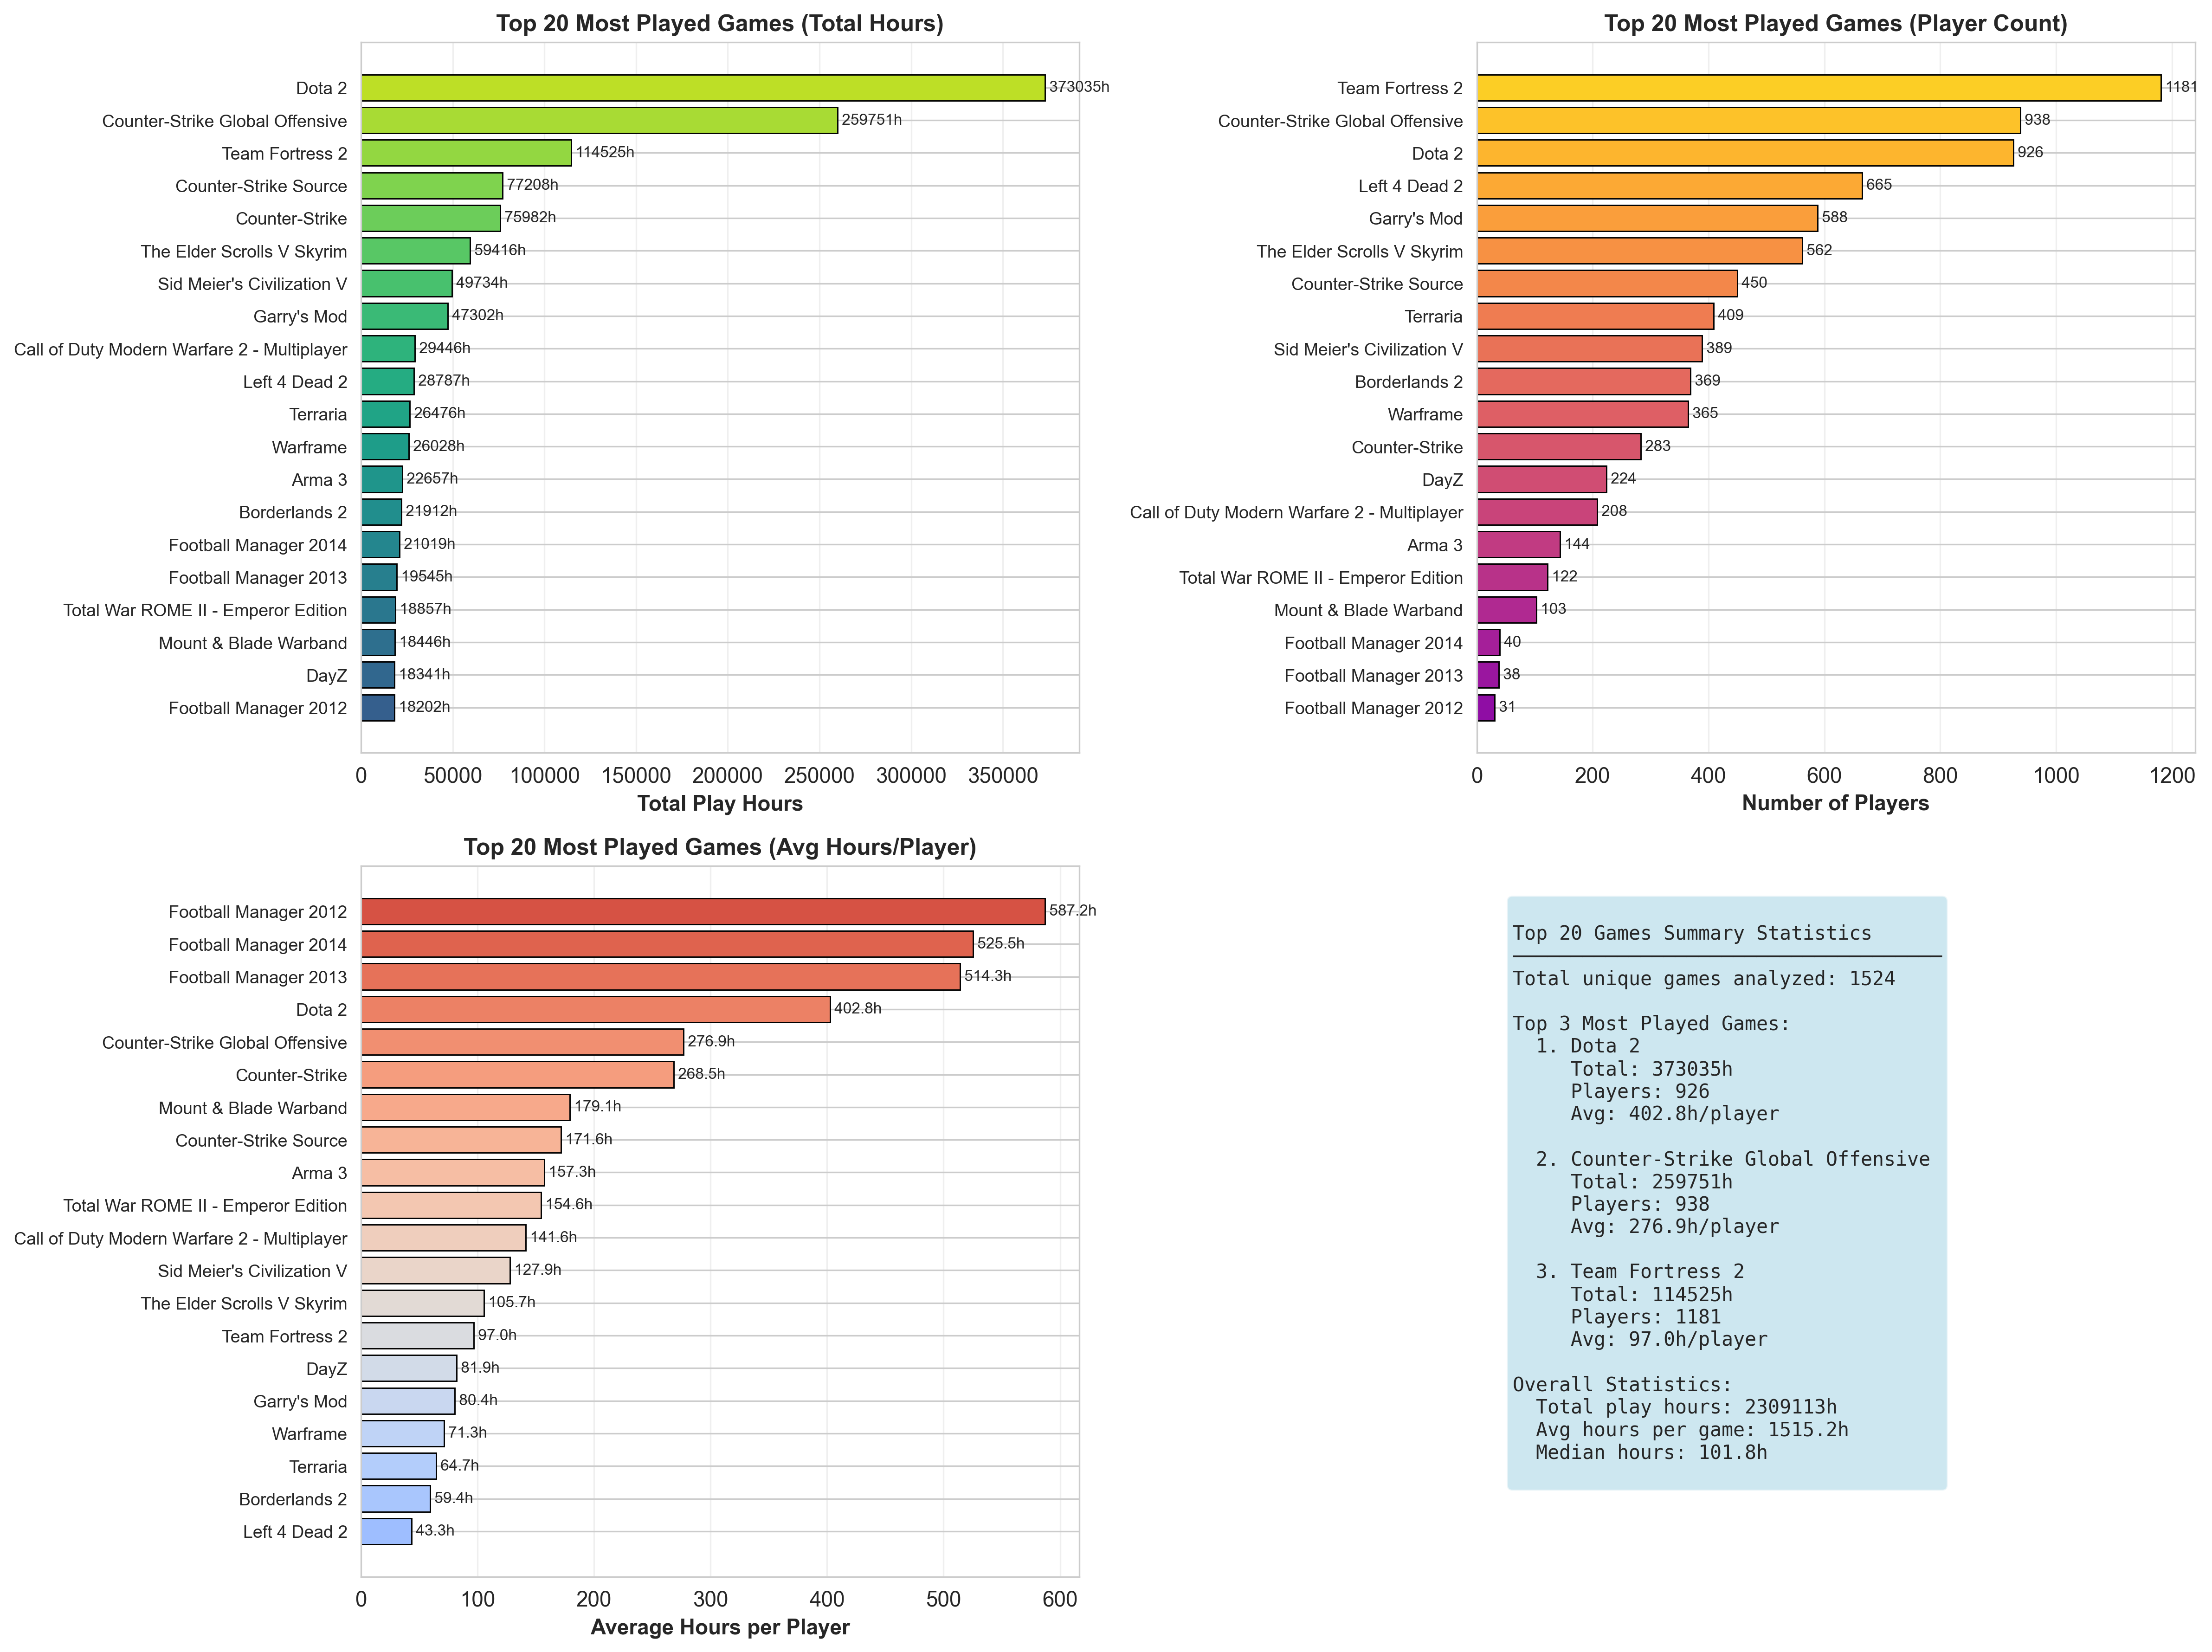


✓ Top 20 games visualization saved


In [11]:
## Top 20 Most Played Games
print("\n" + "=" * 60)
print("Top 20 Most Played Games")
print("=" * 60)

# Calculate total play hours per game
game_popularity = df_play.groupby('game-title')['value'].agg(['sum', 'count', 'mean']).sort_values('sum', ascending=False)
game_popularity.columns = ['Total Hours', 'Player Count', 'Avg Hours per Player']

print("\nTop 20 Most Played Games (by total hours):")
print(game_popularity.head(20))

# Visualization: Top 20 games bar chart
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Top 20 games by total hours
ax1 = axes[0, 0]
top20_games_hours = game_popularity.head(20)['Total Hours'].sort_values()
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(top20_games_hours)))
bars1 = ax1.barh(range(len(top20_games_hours)), top20_games_hours.values, color=colors, edgecolor='black', linewidth=0.7)
ax1.set_yticks(range(len(top20_games_hours)))
ax1.set_yticklabels(top20_games_hours.index, fontsize=9)
ax1.set_xlabel('Total Play Hours', fontsize=11, fontweight='bold')
ax1.set_title('Top 20 Most Played Games (Total Hours)', fontsize=12, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
for i, v in enumerate(top20_games_hours.values):
    ax1.text(v, i, f' {v:.0f}h', va='center', fontsize=8)

# 2. Top 20 games by player count
ax2 = axes[0, 1]
top20_games_players = game_popularity.head(20)['Player Count'].sort_values()
colors2 = plt.cm.plasma(np.linspace(0.3, 0.9, len(top20_games_players)))
bars2 = ax2.barh(range(len(top20_games_players)), top20_games_players.values, color=colors2, edgecolor='black', linewidth=0.7)
ax2.set_yticks(range(len(top20_games_players)))
ax2.set_yticklabels(top20_games_players.index, fontsize=9)
ax2.set_xlabel('Number of Players', fontsize=11, fontweight='bold')
ax2.set_title('Top 20 Most Played Games (Player Count)', fontsize=12, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)
for i, v in enumerate(top20_games_players.values):
    ax2.text(v, i, f' {int(v)}', va='center', fontsize=8)

# 3. Top 20 games by average hours per player
ax3 = axes[1, 0]
top20_games_avg = game_popularity.head(20)['Avg Hours per Player'].sort_values()
colors3 = plt.cm.coolwarm(np.linspace(0.3, 0.9, len(top20_games_avg)))
bars3 = ax3.barh(range(len(top20_games_avg)), top20_games_avg.values, color=colors3, edgecolor='black', linewidth=0.7)
ax3.set_yticks(range(len(top20_games_avg)))
ax3.set_yticklabels(top20_games_avg.index, fontsize=9)
ax3.set_xlabel('Average Hours per Player', fontsize=11, fontweight='bold')
ax3.set_title('Top 20 Most Played Games (Avg Hours/Player)', fontsize=12, fontweight='bold')
ax3.grid(axis='x', alpha=0.3)
for i, v in enumerate(top20_games_avg.values):
    ax3.text(v, i, f' {v:.1f}h', va='center', fontsize=8)

# 4. Summary statistics
ax4 = axes[1, 1]
ax4.axis('off')
summary_stats = f"""
Top 20 Games Summary Statistics
─────────────────────────────────────
Total unique games analyzed: {len(game_popularity)}

Top 3 Most Played Games:
  1. {game_popularity.index[0]}
     Total: {game_popularity['Total Hours'].iloc[0]:.0f}h
     Players: {int(game_popularity['Player Count'].iloc[0])}
     Avg: {game_popularity['Avg Hours per Player'].iloc[0]:.1f}h/player

  2. {game_popularity.index[1]}
     Total: {game_popularity['Total Hours'].iloc[1]:.0f}h
     Players: {int(game_popularity['Player Count'].iloc[1])}
     Avg: {game_popularity['Avg Hours per Player'].iloc[1]:.1f}h/player

  3. {game_popularity.index[2]}
     Total: {game_popularity['Total Hours'].iloc[2]:.0f}h
     Players: {int(game_popularity['Player Count'].iloc[2])}
     Avg: {game_popularity['Avg Hours per Player'].iloc[2]:.1f}h/player

Overall Statistics:
  Total play hours: {game_popularity['Total Hours'].sum():.0f}h
  Avg hours per game: {game_popularity['Total Hours'].mean():.1f}h
  Median hours: {game_popularity['Total Hours'].median():.1f}h
"""
ax4.text(0.05, 0.95, summary_stats, transform=ax4.transAxes, 
         fontsize=10, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.6))

plt.tight_layout()
plt.savefig('top20_games_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Top 20 games visualization saved")



User Activity Distribution Analysis

User Activity Statistics:
        Total Hours  Games Played  Avg Hours per Game      Std Dev
count   2435.000000   2435.000000         2435.000000  2434.000000
mean     948.300945     22.183573           61.372324   128.909778
std     1285.576729     28.752557          112.880338   238.908640
min        1.500000      1.000000            0.366667     0.081650
25%      136.300000      7.000000           11.947258    18.113521
50%      465.300000     12.000000           28.033333    53.223139
75%     1244.300000     24.000000           62.717949   141.674679
max    11547.600000    309.000000         1808.866667  4232.432283


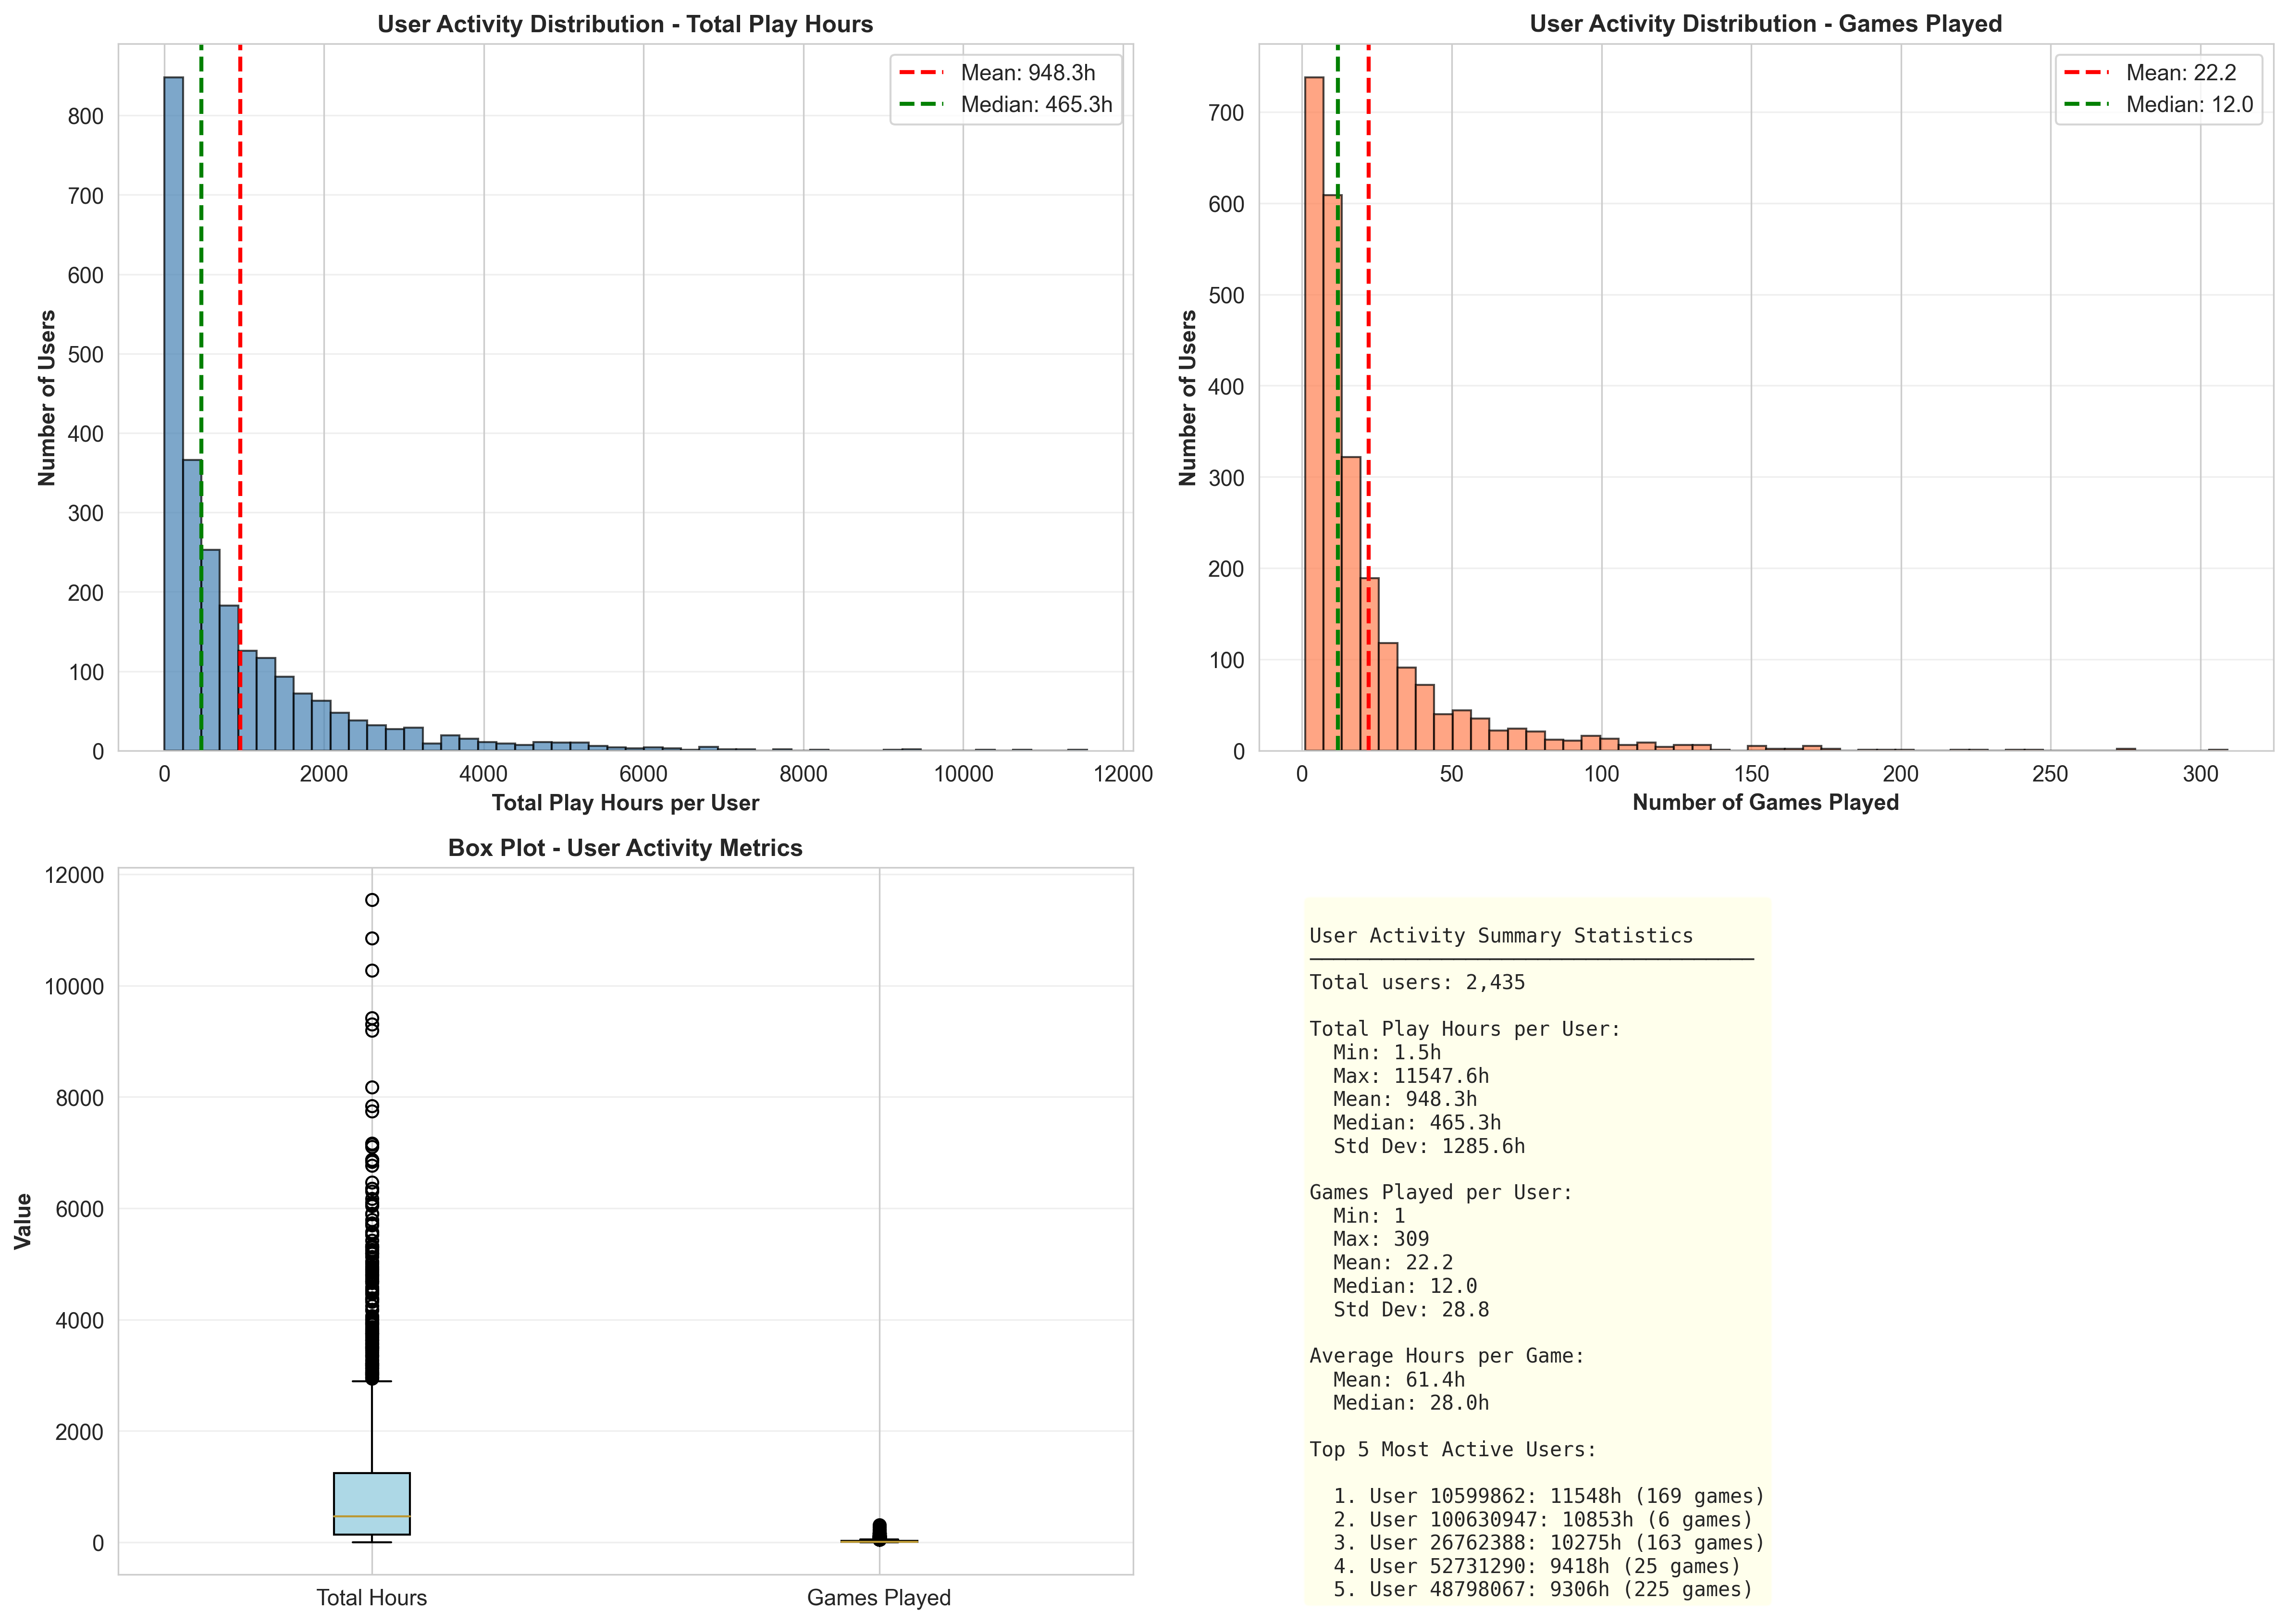


✓ User activity distribution visualization saved


In [12]:
## User Activity Distribution Analysis
print("\n" + "=" * 60)
print("User Activity Distribution Analysis")
print("=" * 60)

# Calculate user activity metrics
user_activity = df_play.groupby('user-id')['value'].agg(['sum', 'count', 'mean', 'std']).sort_values('sum', ascending=False)
user_activity.columns = ['Total Hours', 'Games Played', 'Avg Hours per Game', 'Std Dev']

print("\nUser Activity Statistics:")
print(user_activity.describe())

# Visualization: User activity distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Histogram of total play hours per user
ax1 = axes[0, 0]
ax1.hist(user_activity['Total Hours'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Total Play Hours per User', fontsize=11, fontweight='bold')
ax1.set_ylabel('Number of Users', fontsize=11, fontweight='bold')
ax1.set_title('User Activity Distribution - Total Play Hours', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
ax1.axvline(user_activity['Total Hours'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {user_activity["Total Hours"].mean():.1f}h')
ax1.axvline(user_activity['Total Hours'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {user_activity["Total Hours"].median():.1f}h')
ax1.legend()

# 2. Histogram of games played per user
ax2 = axes[0, 1]
ax2.hist(user_activity['Games Played'], bins=50, color='coral', edgecolor='black', alpha=0.7)
ax2.set_xlabel('Number of Games Played', fontsize=11, fontweight='bold')
ax2.set_ylabel('Number of Users', fontsize=11, fontweight='bold')
ax2.set_title('User Activity Distribution - Games Played', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
ax2.axvline(user_activity['Games Played'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {user_activity["Games Played"].mean():.1f}')
ax2.axvline(user_activity['Games Played'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {user_activity["Games Played"].median():.1f}')
ax2.legend()

# 3. Box plots for user activity
ax3 = axes[1, 0]
box_data = [user_activity['Total Hours'], user_activity['Games Played']]
bp = ax3.boxplot(box_data, labels=['Total Hours', 'Games Played'], patch_artist=True)
for patch, color in zip(bp['boxes'], ['lightblue', 'lightcoral']):
    patch.set_facecolor(color)
ax3.set_ylabel('Value', fontsize=11, fontweight='bold')
ax3.set_title('Box Plot - User Activity Metrics', fontsize=12, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

# 4. Summary statistics panel
ax4 = axes[1, 1]
ax4.axis('off')
user_stats = f"""
User Activity Summary Statistics
─────────────────────────────────────
Total users: {len(user_activity):,}

Total Play Hours per User:
  Min: {user_activity['Total Hours'].min():.1f}h
  Max: {user_activity['Total Hours'].max():.1f}h
  Mean: {user_activity['Total Hours'].mean():.1f}h
  Median: {user_activity['Total Hours'].median():.1f}h
  Std Dev: {user_activity['Total Hours'].std():.1f}h

Games Played per User:
  Min: {user_activity['Games Played'].min():.0f}
  Max: {user_activity['Games Played'].max():.0f}
  Mean: {user_activity['Games Played'].mean():.1f}
  Median: {user_activity['Games Played'].median():.1f}
  Std Dev: {user_activity['Games Played'].std():.1f}

Average Hours per Game:
  Mean: {user_activity['Avg Hours per Game'].mean():.1f}h
  Median: {user_activity['Avg Hours per Game'].median():.1f}h

Top 5 Most Active Users:
"""
for idx, (user, row) in enumerate(user_activity.head(5).iterrows(), 1):
    user_stats += f"\n  {idx}. User {user}: {row['Total Hours']:.0f}h ({int(row['Games Played'])} games)"

ax4.text(0.05, 0.95, user_stats, transform=ax4.transAxes, 
         fontsize=10, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.6))

plt.tight_layout()
plt.savefig('user_activity_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ User activity distribution visualization saved")



Game Popularity Distribution Analysis

Game Popularity Statistics:
         Total Hours  Player Count  Avg Hours per Player
count    1524.000000   1524.000000           1524.000000
mean     1515.165879     35.444226             17.644595
std     12761.968782     71.521144             43.728617
min         0.800000      5.000000              0.160000
25%        28.850000      8.000000              2.857310
50%       101.850000     14.000000              6.568333
75%       439.275000     34.000000             16.032512
max    373034.600000   1181.000000            587.170968


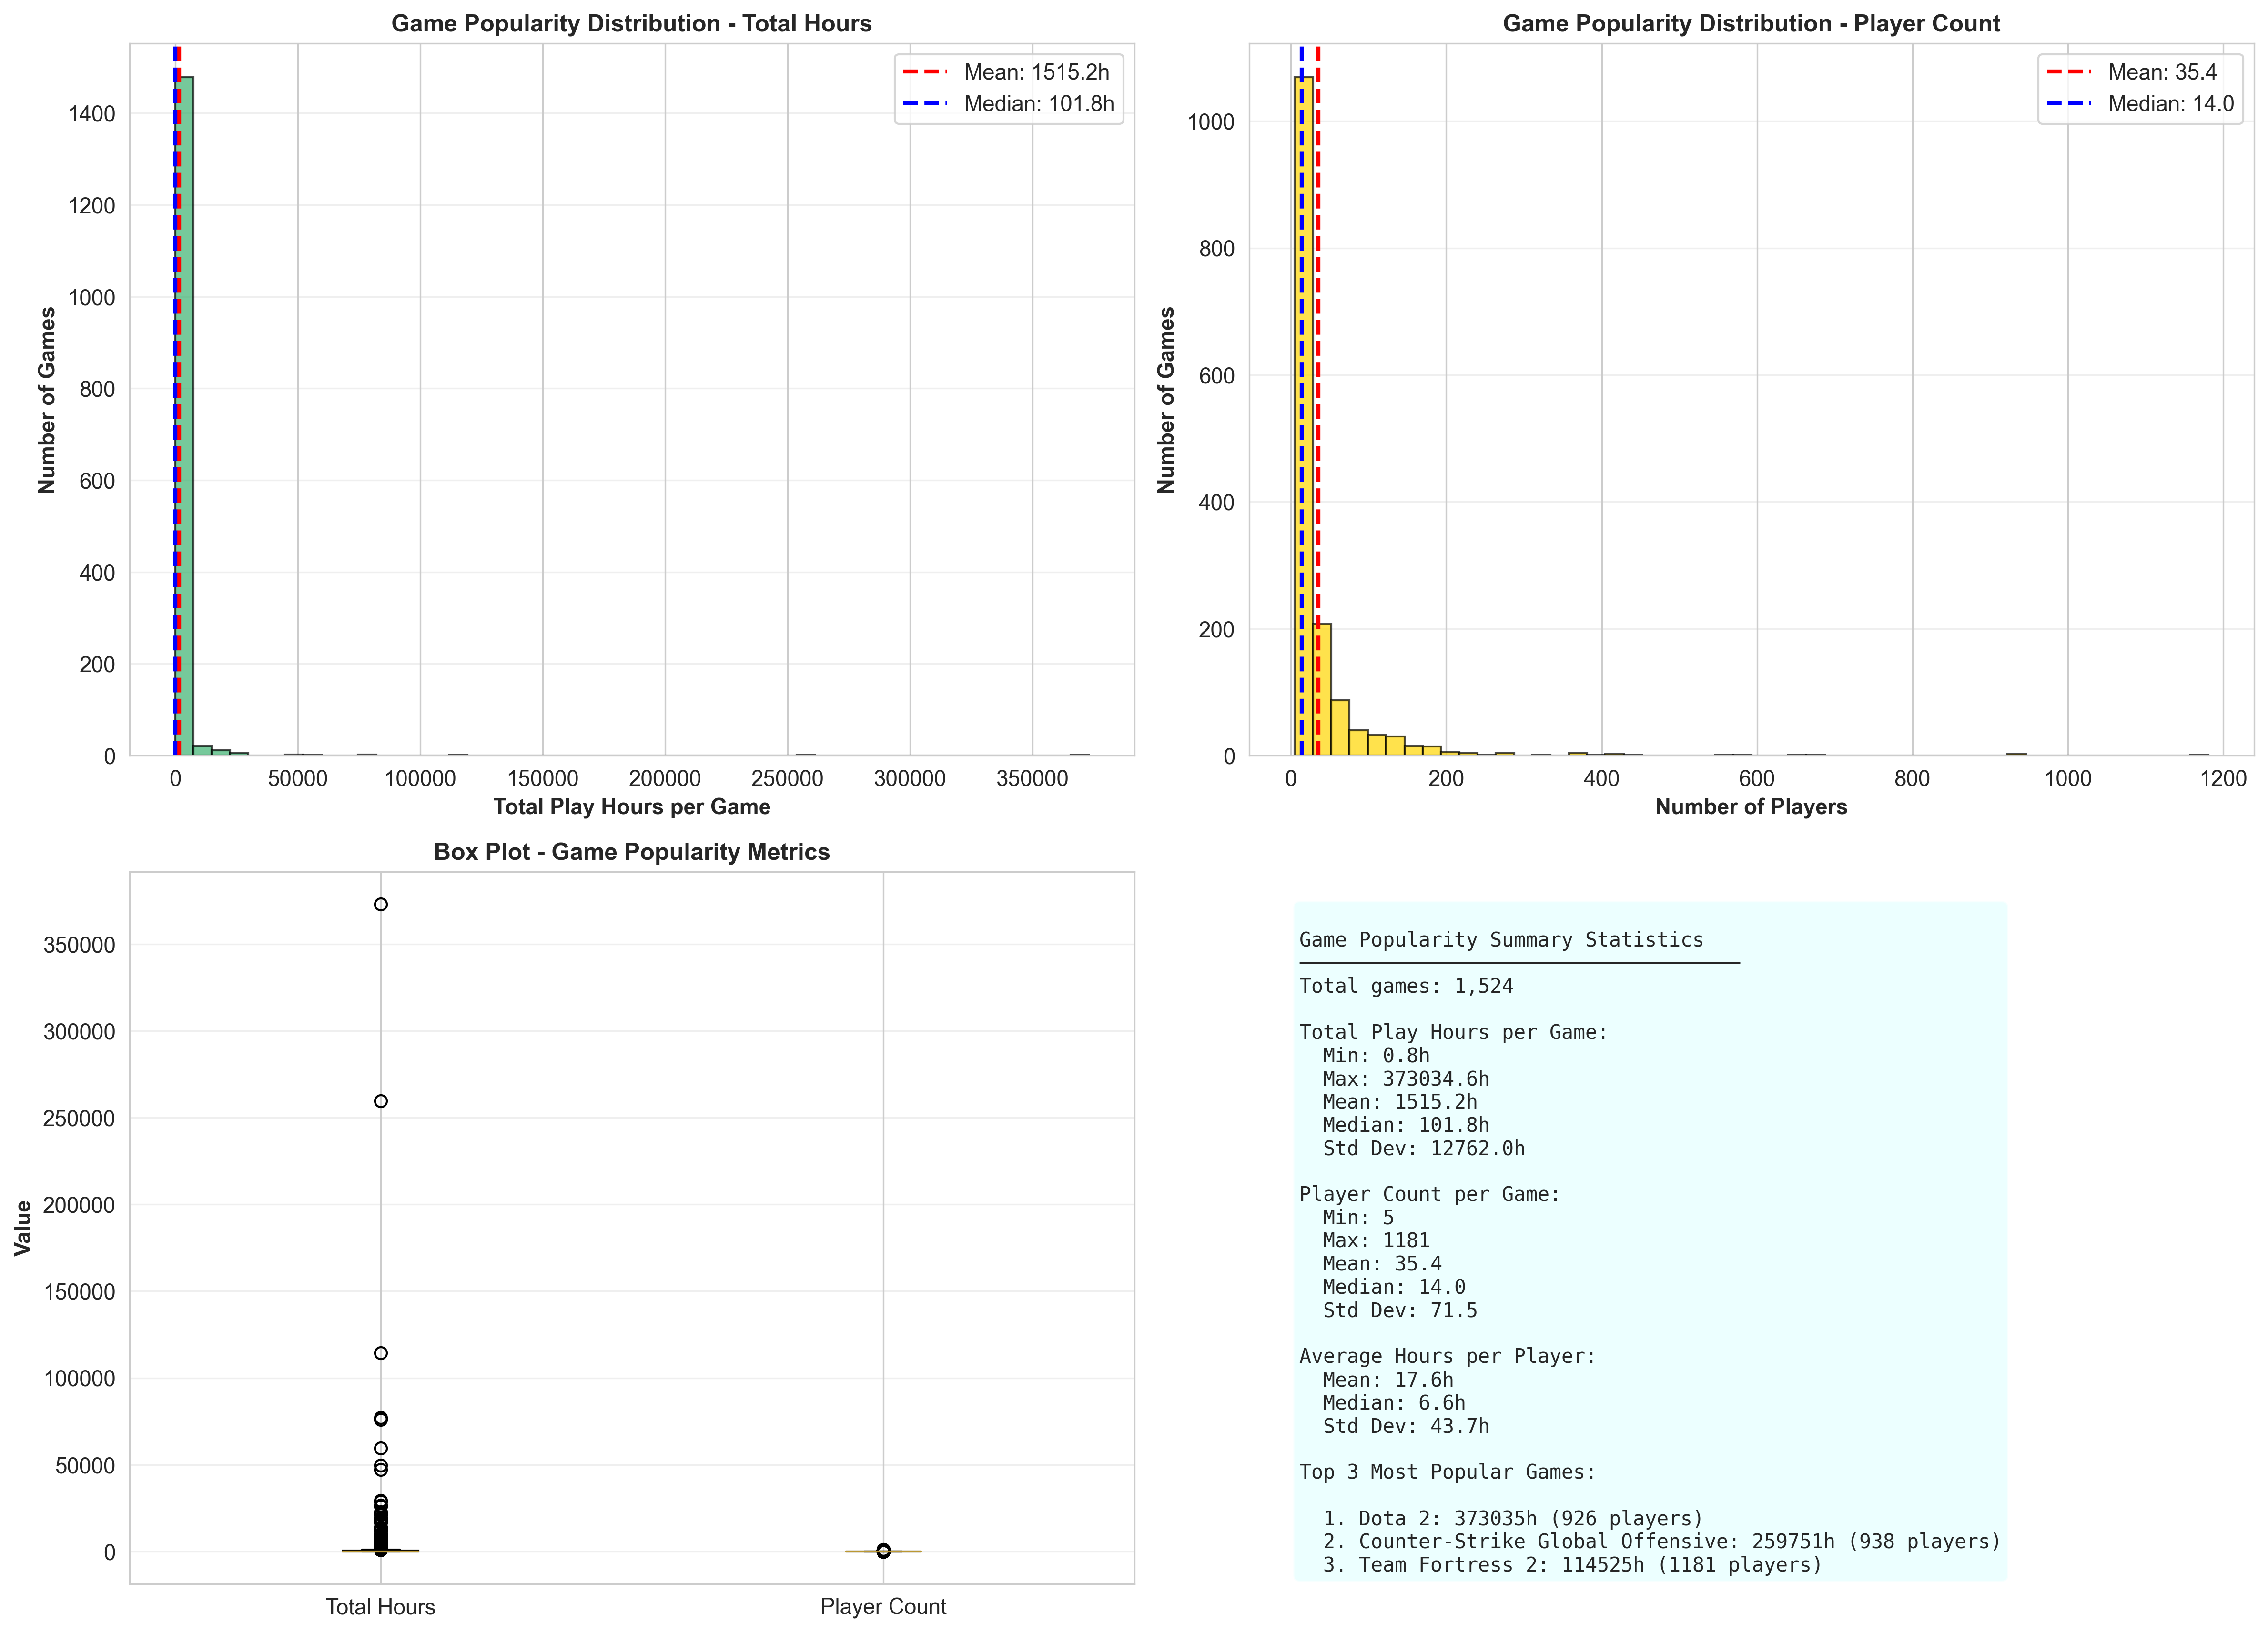


✓ Game popularity distribution visualization saved


In [13]:
## Game Popularity Distribution Analysis
print("\n" + "=" * 60)
print("Game Popularity Distribution Analysis")
print("=" * 60)

print("\nGame Popularity Statistics:")
print(game_popularity.describe())

# Visualization: Game popularity distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Histogram of total hours per game
ax1 = axes[0, 0]
ax1.hist(game_popularity['Total Hours'], bins=50, color='mediumseagreen', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Total Play Hours per Game', fontsize=11, fontweight='bold')
ax1.set_ylabel('Number of Games', fontsize=11, fontweight='bold')
ax1.set_title('Game Popularity Distribution - Total Hours', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
ax1.axvline(game_popularity['Total Hours'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {game_popularity["Total Hours"].mean():.1f}h')
ax1.axvline(game_popularity['Total Hours'].median(), color='blue', linestyle='--', linewidth=2, label=f'Median: {game_popularity["Total Hours"].median():.1f}h')
ax1.legend()

# 2. Histogram of player count per game
ax2 = axes[0, 1]
ax2.hist(game_popularity['Player Count'], bins=50, color='gold', edgecolor='black', alpha=0.7)
ax2.set_xlabel('Number of Players', fontsize=11, fontweight='bold')
ax2.set_ylabel('Number of Games', fontsize=11, fontweight='bold')
ax2.set_title('Game Popularity Distribution - Player Count', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
ax2.axvline(game_popularity['Player Count'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {game_popularity["Player Count"].mean():.1f}')
ax2.axvline(game_popularity['Player Count'].median(), color='blue', linestyle='--', linewidth=2, label=f'Median: {game_popularity["Player Count"].median():.1f}')
ax2.legend()

# 3. Box plots for game popularity
ax3 = axes[1, 0]
box_data_games = [game_popularity['Total Hours'], game_popularity['Player Count']]
bp_games = ax3.boxplot(box_data_games, labels=['Total Hours', 'Player Count'], patch_artist=True)
for patch, color in zip(bp_games['boxes'], ['lightgreen', 'lightyellow']):
    patch.set_facecolor(color)
ax3.set_ylabel('Value', fontsize=11, fontweight='bold')
ax3.set_title('Box Plot - Game Popularity Metrics', fontsize=12, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

# 4. Summary statistics panel
ax4 = axes[1, 1]
ax4.axis('off')
game_pop_stats = f"""
Game Popularity Summary Statistics
─────────────────────────────────────
Total games: {len(game_popularity):,}

Total Play Hours per Game:
  Min: {game_popularity['Total Hours'].min():.1f}h
  Max: {game_popularity['Total Hours'].max():.1f}h
  Mean: {game_popularity['Total Hours'].mean():.1f}h
  Median: {game_popularity['Total Hours'].median():.1f}h
  Std Dev: {game_popularity['Total Hours'].std():.1f}h

Player Count per Game:
  Min: {game_popularity['Player Count'].min():.0f}
  Max: {game_popularity['Player Count'].max():.0f}
  Mean: {game_popularity['Player Count'].mean():.1f}
  Median: {game_popularity['Player Count'].median():.1f}
  Std Dev: {game_popularity['Player Count'].std():.1f}

Average Hours per Player:
  Mean: {game_popularity['Avg Hours per Player'].mean():.1f}h
  Median: {game_popularity['Avg Hours per Player'].median():.1f}h
  Std Dev: {game_popularity['Avg Hours per Player'].std():.1f}h

Top 3 Most Popular Games:
"""
for idx, (game, row) in enumerate(game_popularity.head(3).iterrows(), 1):
    game_pop_stats += f"\n  {idx}. {game}: {row['Total Hours']:.0f}h ({int(row['Player Count'])} players)"

ax4.text(0.05, 0.95, game_pop_stats, transform=ax4.transAxes, 
         fontsize=10, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='lightcyan', alpha=0.6))

plt.tight_layout()
plt.savefig('game_popularity_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Game popularity distribution visualization saved")



User-Item Matrix Heatmap Visualization


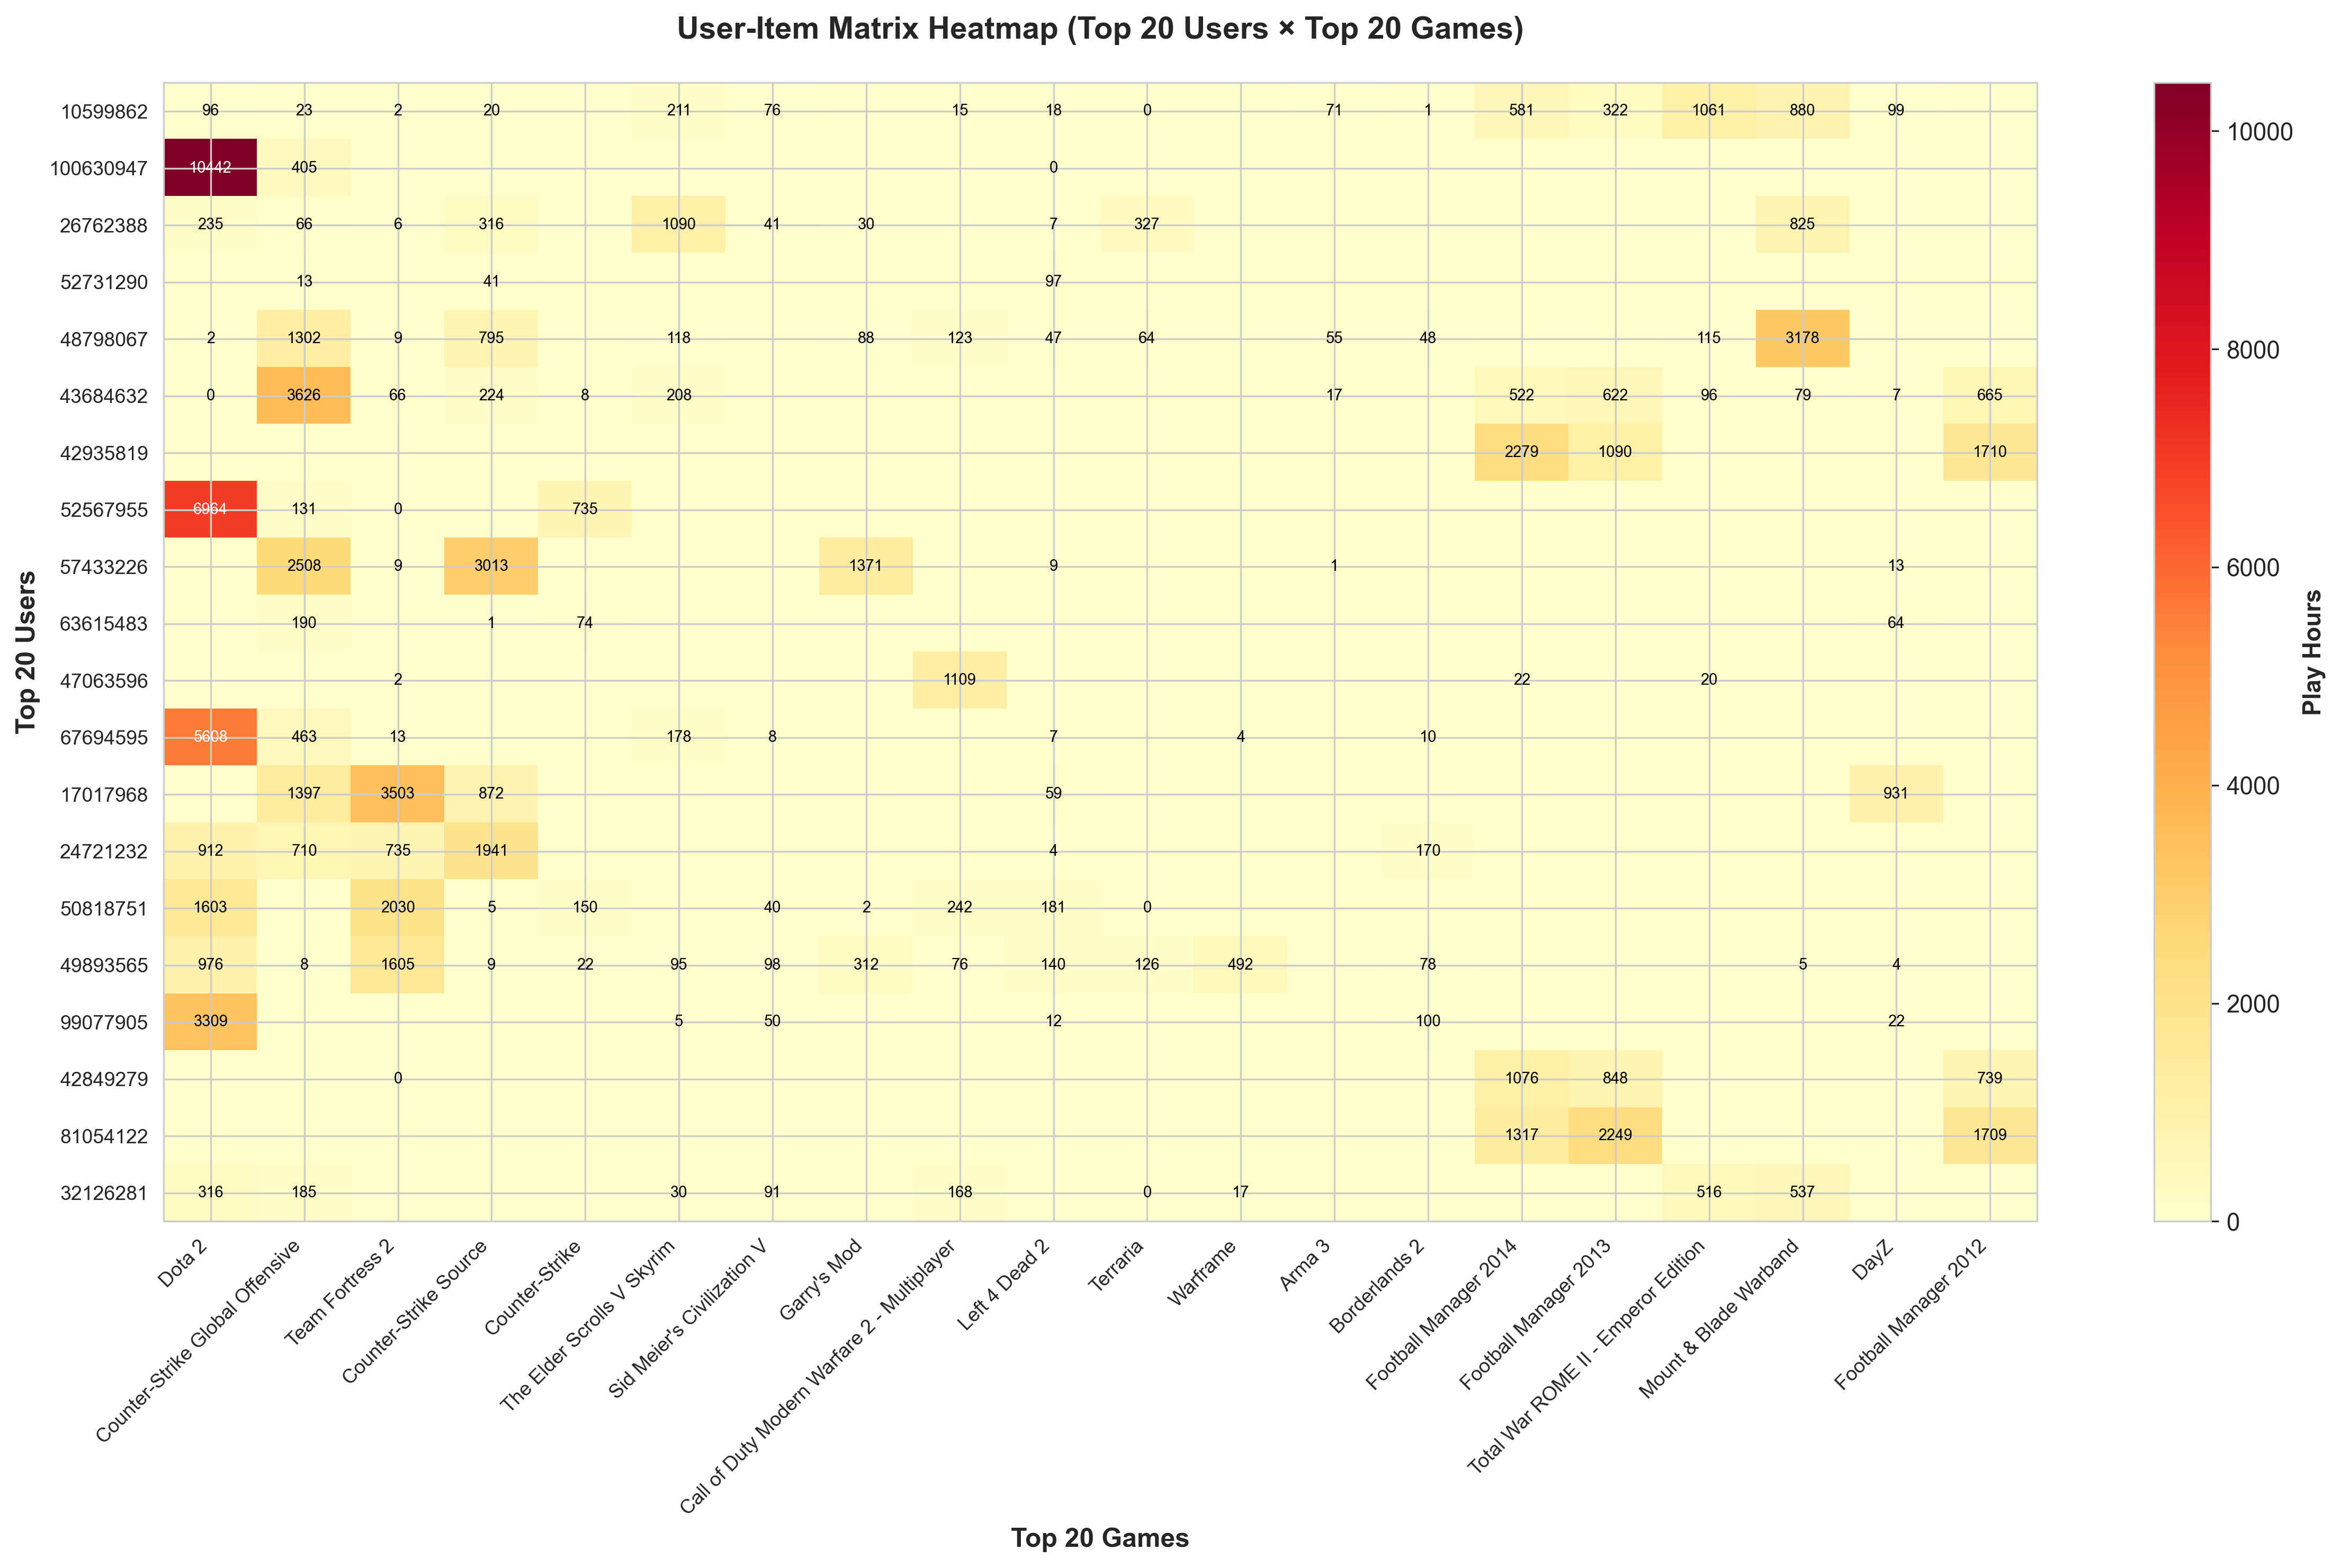

✓ User-Item heatmap saved (Top 20 users × Top 20 games)


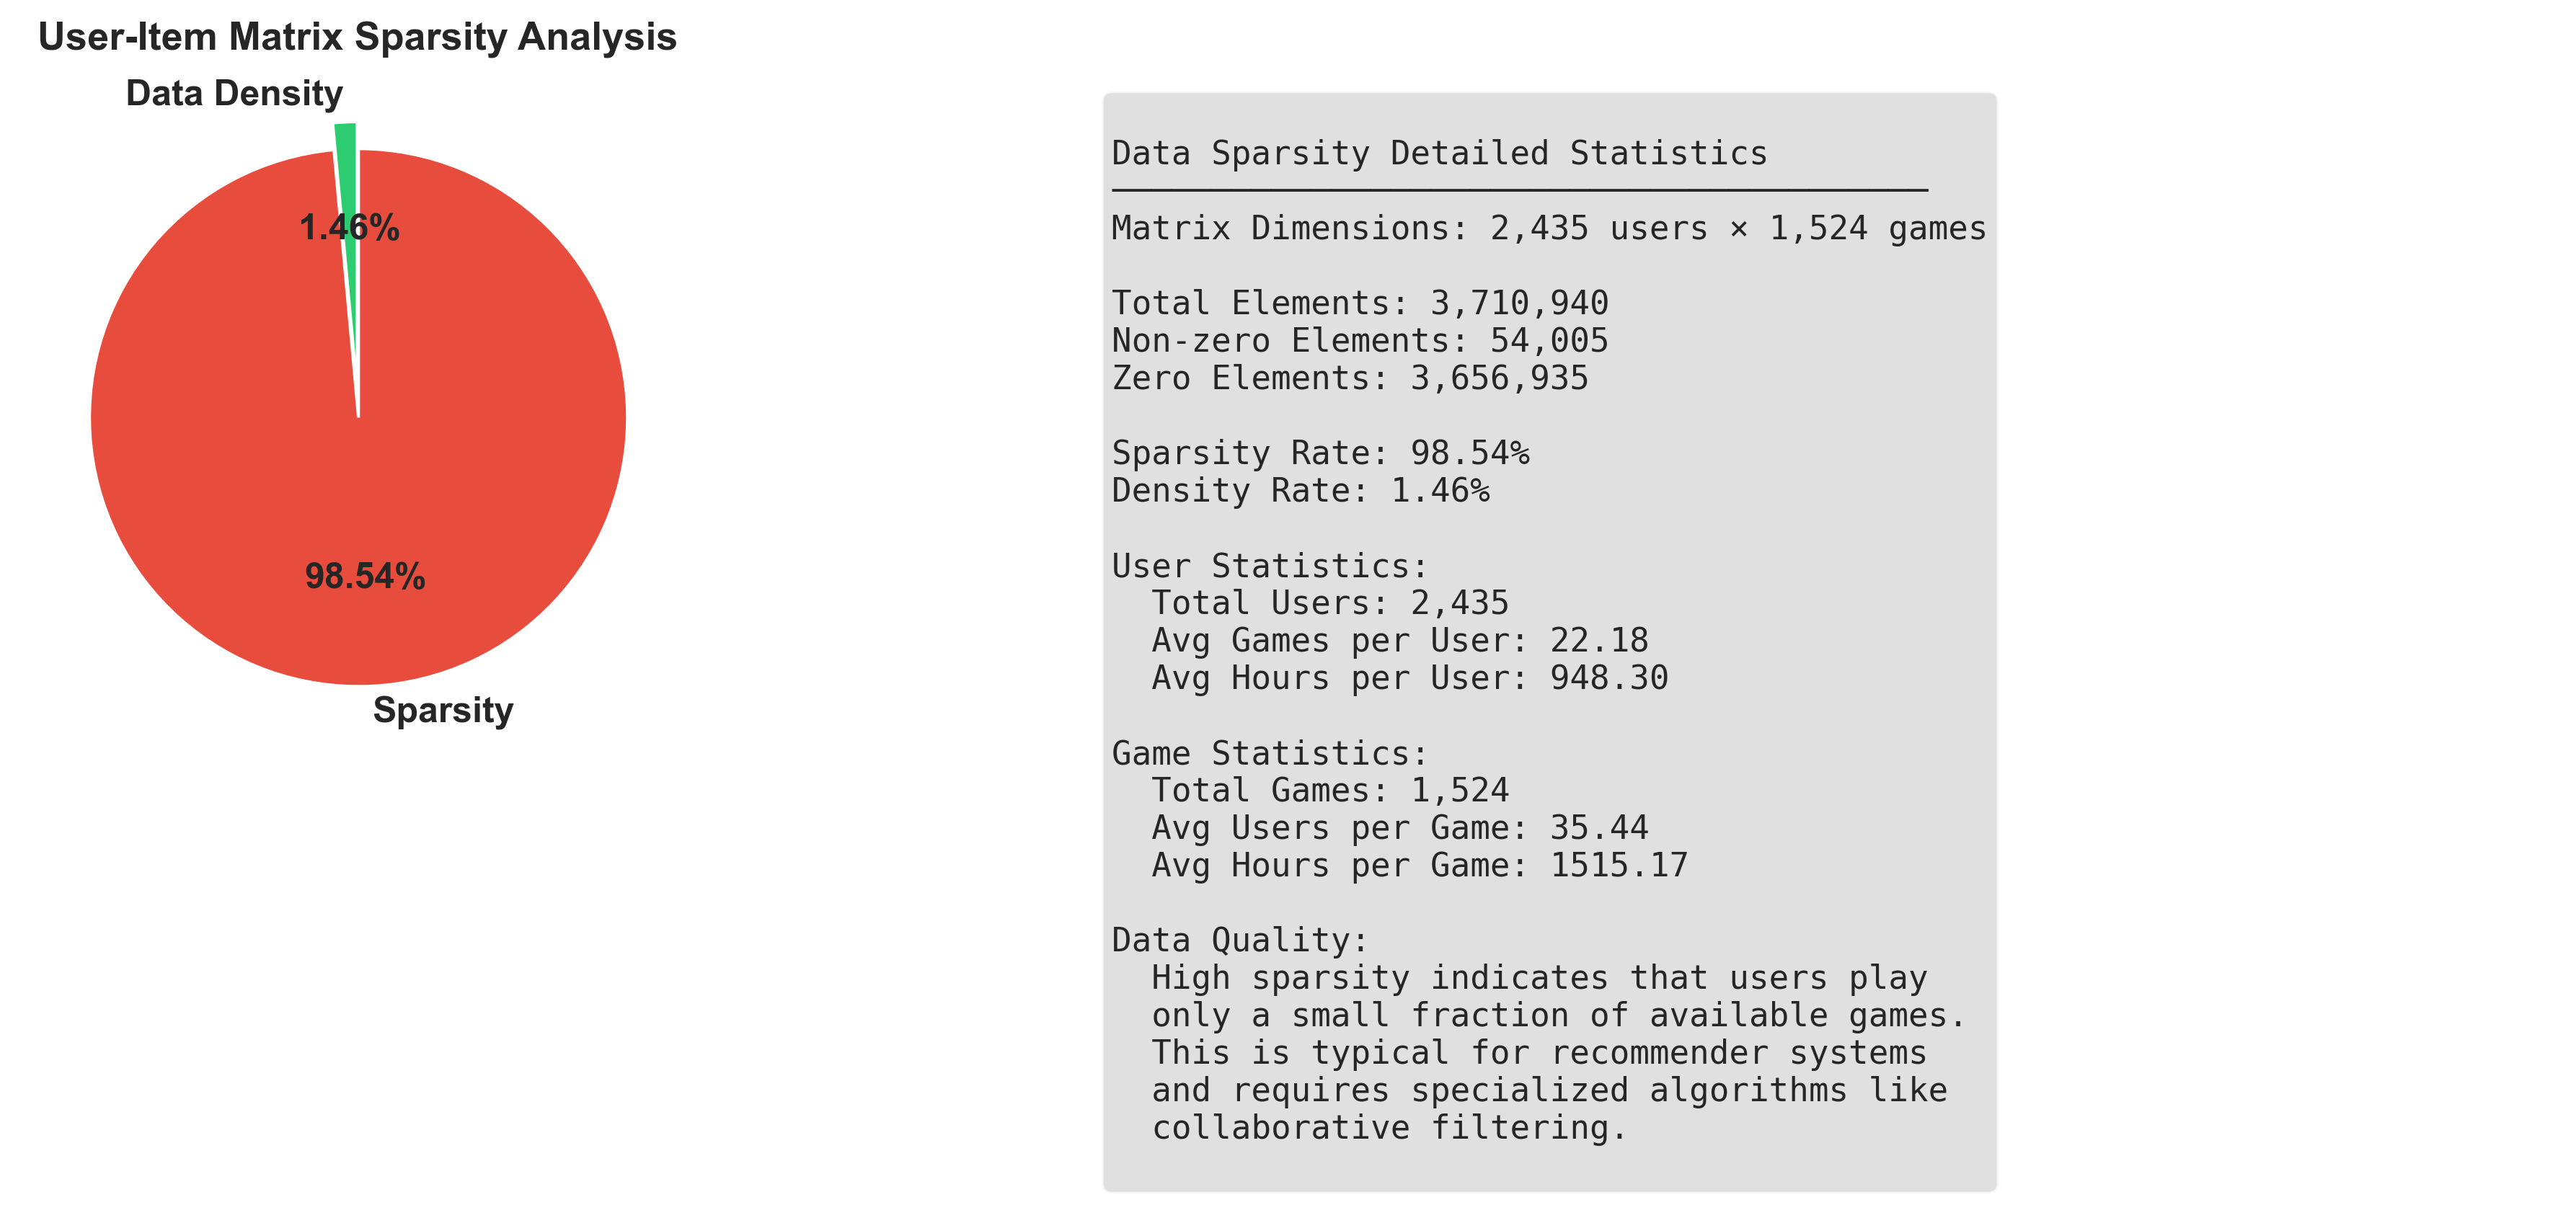

✓ Sparsity analysis visualization saved


In [14]:
## Heatmap and Matrix Visualization
print("\n" + "=" * 60)
print("User-Item Matrix Heatmap Visualization")
print("=" * 60)

# Select top users and top games for clearer heatmap
top_n_users = 20
top_n_games = 20

top_users = user_activity.head(top_n_users).index
top_games = game_popularity.head(top_n_games).index

# Create subset matrix
subset_matrix = user_item_matrix.loc[top_users, top_games]

# Create heatmap
fig, ax = plt.subplots(figsize=(16, 10))
im = ax.imshow(subset_matrix.values, cmap='YlOrRd', aspect='auto')

# Set ticks and labels
ax.set_xticks(range(len(top_games)))
ax.set_yticks(range(len(top_users)))
ax.set_xticklabels(top_games, rotation=45, ha='right', fontsize=9)
ax.set_yticklabels(top_users, fontsize=9)

# Labels
ax.set_xlabel('Top 20 Games', fontsize=12, fontweight='bold')
ax.set_ylabel('Top 20 Users', fontsize=12, fontweight='bold')
ax.set_title('User-Item Matrix Heatmap (Top 20 Users × Top 20 Games)', fontsize=14, fontweight='bold', pad=20)

# Colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Play Hours', fontsize=11, fontweight='bold')

# Add values to cells
for i in range(len(top_users)):
    for j in range(len(top_games)):
        value = subset_matrix.values[i, j]
        if value > 0:
            text = ax.text(j, i, f'{value:.0f}', ha='center', va='center', 
                          color='black' if value < subset_matrix.values.max()/2 else 'white',
                          fontsize=7)

plt.tight_layout()
plt.savefig('user_item_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ User-Item heatmap saved (Top {top_n_users} users × Top {top_n_games} games)")

# Sparsity visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Sparsity pie chart
ax1 = axes[0]
sizes = [100 - sparsity, sparsity]
colors_pie = ['#2ecc71', '#e74c3c']
explode = (0.05, 0.05)
ax1.pie(sizes, explode=explode, labels=['Data Density', 'Sparsity'], 
        colors=colors_pie, autopct='%1.2f%%', startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
ax1.set_title('User-Item Matrix Sparsity Analysis', fontsize=13, fontweight='bold')

# 2. Sparsity statistics
ax2 = axes[1]
ax2.axis('off')
sparsity_text = f"""
Data Sparsity Detailed Statistics
─────────────────────────────────────────
Matrix Dimensions: {user_item_matrix.shape[0]:,} users × {user_item_matrix.shape[1]:,} games

Total Elements: {total_elements:,}
Non-zero Elements: {total_elements - zero_elements:,}
Zero Elements: {zero_elements:,}

Sparsity Rate: {sparsity:.2f}%
Density Rate: {100 - sparsity:.2f}%

User Statistics:
  Total Users: {len(user_activity):,}
  Avg Games per User: {user_activity['Games Played'].mean():.2f}
  Avg Hours per User: {user_activity['Total Hours'].mean():.2f}

Game Statistics:
  Total Games: {len(game_popularity):,}
  Avg Users per Game: {game_popularity['Player Count'].mean():.2f}
  Avg Hours per Game: {game_popularity['Total Hours'].mean():.2f}

Data Quality:
  High sparsity indicates that users play
  only a small fraction of available games.
  This is typical for recommender systems
  and requires specialized algorithms like
  collaborative filtering.
"""
ax2.text(0.05, 0.95, sparsity_text, transform=ax2.transAxes, 
         fontsize=11, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.7))

plt.tight_layout()
plt.savefig('sparsity_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Sparsity analysis visualization saved")


In [15]:
## Comprehensive EDA Summary Report
print("\n" + "=" * 80)
print("COMPREHENSIVE EDA SUMMARY REPORT".center(80))
print("=" * 80)

print("\n📊 DATASET OVERVIEW")
print("-" * 80)
print(f"Original dataset records: {len(df):,}")
print(f"After 'play' behavior filtering: {len(df_play):,}")
print(f"After user/game filtering (≥5 records): {len(df_play):,}")
print(f"Data reduction: {(1 - len(df_play)/len(df)) * 100:.1f}%")

print("\n👥 USER ANALYSIS")
print("-" * 80)
print(f"Total unique users: {len(user_activity):,}")
print(f"Users per game (avg): {user_activity['Games Played'].mean():.2f}")
print(f"Play hours per user:")
print(f"  - Minimum: {user_activity['Total Hours'].min():.1f}h")
print(f"  - Maximum: {user_activity['Total Hours'].max():.1f}h")
print(f"  - Mean: {user_activity['Total Hours'].mean():.1f}h")
print(f"  - Median: {user_activity['Total Hours'].median():.1f}h")
print(f"  - Std Dev: {user_activity['Total Hours'].std():.1f}h")

print("\n🎮 GAME ANALYSIS")
print("-" * 80)
print(f"Total unique games: {len(game_popularity):,}")
print(f"Players per game (avg): {game_popularity['Player Count'].mean():.2f}")
print(f"Play hours per game:")
print(f"  - Minimum: {game_popularity['Total Hours'].min():.1f}h")
print(f"  - Maximum: {game_popularity['Total Hours'].max():.1f}h")
print(f"  - Mean: {game_popularity['Total Hours'].mean():.1f}h")
print(f"  - Median: {game_popularity['Total Hours'].median():.1f}h")
print(f"  - Std Dev: {game_popularity['Total Hours'].std():.1f}h")

print("\n📈 TOP 5 MOST PLAYED GAMES")
print("-" * 80)
for idx, (game, row) in enumerate(game_popularity.head(5).iterrows(), 1):
    print(f"{idx}. {game}")
    print(f"   Total hours: {row['Total Hours']:.0f}h | Players: {int(row['Player Count'])} | Avg: {row['Avg Hours per Player']:.1f}h/player")

print("\n🔥 TOP 5 MOST ACTIVE USERS")
print("-" * 80)
for idx, (user, row) in enumerate(user_activity.head(5).iterrows(), 1):
    print(f"{idx}. User {user}")
    print(f"   Total hours: {row['Total Hours']:.0f}h | Games: {int(row['Games Played'])} | Avg: {row['Avg Hours per Game']:.1f}h/game")

print("\n🔗 MATRIX STATISTICS")
print("-" * 80)
print(f"Matrix dimensions: {user_item_matrix.shape[0]:,} users × {user_item_matrix.shape[1]:,} games")
print(f"Total possible interactions: {total_elements:,}")
print(f"Actual interactions: {total_elements - zero_elements:,}")
print(f"Data density: {(100 - sparsity):.2f}%")
print(f"Data sparsity: {sparsity:.2f}%")

print("\n📊 DISTRIBUTION CHARACTERISTICS")
print("-" * 80)
# Skewness analysis
from scipy import stats
user_hours_skewness = stats.skew(user_activity['Total Hours'])
game_hours_skewness = stats.skew(game_popularity['Total Hours'])
print(f"User activity skewness: {user_hours_skewness:.2f} (Right-skewed: users with few hours are more common)")
print(f"Game popularity skewness: {game_hours_skewness:.2f} (Right-skewed: unpopular games are more common)")

# Concentration analysis
top_5_games_share = (game_popularity['Total Hours'].head(5).sum() / game_popularity['Total Hours'].sum()) * 100
top_20_games_share = (game_popularity['Total Hours'].head(20).sum() / game_popularity['Total Hours'].sum()) * 100
print(f"\nMarket concentration:")
print(f"  Top 5 games account for: {top_5_games_share:.1f}% of total play hours")
print(f"  Top 20 games account for: {top_20_games_share:.1f}% of total play hours")

print("\n✅ ALL VISUALIZATIONS GENERATED")
print("-" * 80)
print("✓ Top 20 most played games analysis")
print("✓ User activity distribution analysis")
print("✓ Game popularity distribution analysis")
print("✓ User-Item matrix heatmap")
print("✓ Data sparsity analysis")
print("=" * 80)



                        COMPREHENSIVE EDA SUMMARY REPORT                        

📊 DATASET OVERVIEW
--------------------------------------------------------------------------------
Original dataset records: 199,999
After 'play' behavior filtering: 54,017
After user/game filtering (≥5 records): 54,017
Data reduction: 73.0%

👥 USER ANALYSIS
--------------------------------------------------------------------------------
Total unique users: 2,435
Users per game (avg): 22.18
Play hours per user:
  - Minimum: 1.5h
  - Maximum: 11547.6h
  - Mean: 948.3h
  - Median: 465.3h
  - Std Dev: 1285.6h

🎮 GAME ANALYSIS
--------------------------------------------------------------------------------
Total unique games: 1,524
Players per game (avg): 35.44
Play hours per game:
  - Minimum: 0.8h
  - Maximum: 373034.6h
  - Mean: 1515.2h
  - Median: 101.8h
  - Std Dev: 12762.0h

📈 TOP 5 MOST PLAYED GAMES
--------------------------------------------------------------------------------
1. Dota 2
   Total ho

In [16]:
## Verify Generated Files
import os

print("\n" + "=" * 80)
print("GENERATED FILES SUMMARY".center(80))
print("=" * 80)

# List all PNG files generated
png_files = [f for f in os.listdir('.') if f.endswith('.png')]

if png_files:
    print(f"\n✓ Total visualization files generated: {len(png_files)}")
    print("\nGenerated files:")
    for idx, f in enumerate(sorted(png_files), 1):
        file_size = os.path.getsize(f) / 1024  # Size in KB
        print(f"  {idx}. {f} ({file_size:.1f} KB)")
else:
    print("No PNG files found in current directory")

print("\n" + "=" * 80)
print("EDA ANALYSIS COMPLETE".center(80))
print("=" * 80)



                            GENERATED FILES SUMMARY                             

✓ Total visualization files generated: 8

Generated files:
  1. baseline_comparison.png (200.6 KB)
  2. game_distribution_analysis.png (655.8 KB)
  3. game_popularity_distribution.png (462.7 KB)
  4. sparsity_analysis.png (354.7 KB)
  5. top20_games_analysis.png (931.2 KB)
  6. user_activity_distribution.png (511.1 KB)
  7. user_distribution_analysis.png (543.9 KB)
  8. user_item_heatmap.png (725.5 KB)

                             EDA ANALYSIS COMPLETE                              


## Load Steam-200k Dataset and Print Column Names

The code below reads `steam-200k.csv/steam-200k.csv` and prints DataFrame column names line by line.

### Baseline Model Implementation and Evaluation (User-Game Playtime Prediction)

This code implements four baseline models (Global Mean, User Mean, Item Mean, Popularity Model) for predicting game playtime. It preprocesses data to filter valid interactions, splits data by user groups, and outputs performance metrics, a summary report, and visualizations—serving as a benchmark for subsequent recommendation models.


                         BASELINE MODELS IMPLEMENTATION                         
Original dataset size: 199999 records
After filtering 'play': 70489 records
After sparsity filtering: 54017 records
Remaining users: 2435
Remaining games: 1524
Train set size: 42270 records
Test set size: 11747 records

--- Training Global Mean ---
Global Mean fitted — global mean: 44.94 hours
--- Evaluating Global Mean ---
MAE: 53.9768
RMSE: 129.4065

--- Training User Mean ---
User Mean fitted — 2434 users modeled
--- Evaluating User Mean ---
MAE: 57.7994
RMSE: 152.4522

--- Training Item Mean ---
Item Mean fitted — 1381 games modeled
--- Evaluating Item Mean ---
MAE: 45.4903
RMSE: 125.0624

--- Training Popularity Model ---
Popularity Model fitted — 10 popularity bins
--- Evaluating Popularity Model ---
MAE: 45.2388
RMSE: 126.9531

                       BASELINE MODELS EVALUATION RESULTS                       

Results (sorted by RMSE):
              model        MAE        RMSE
2         Item Mean  4

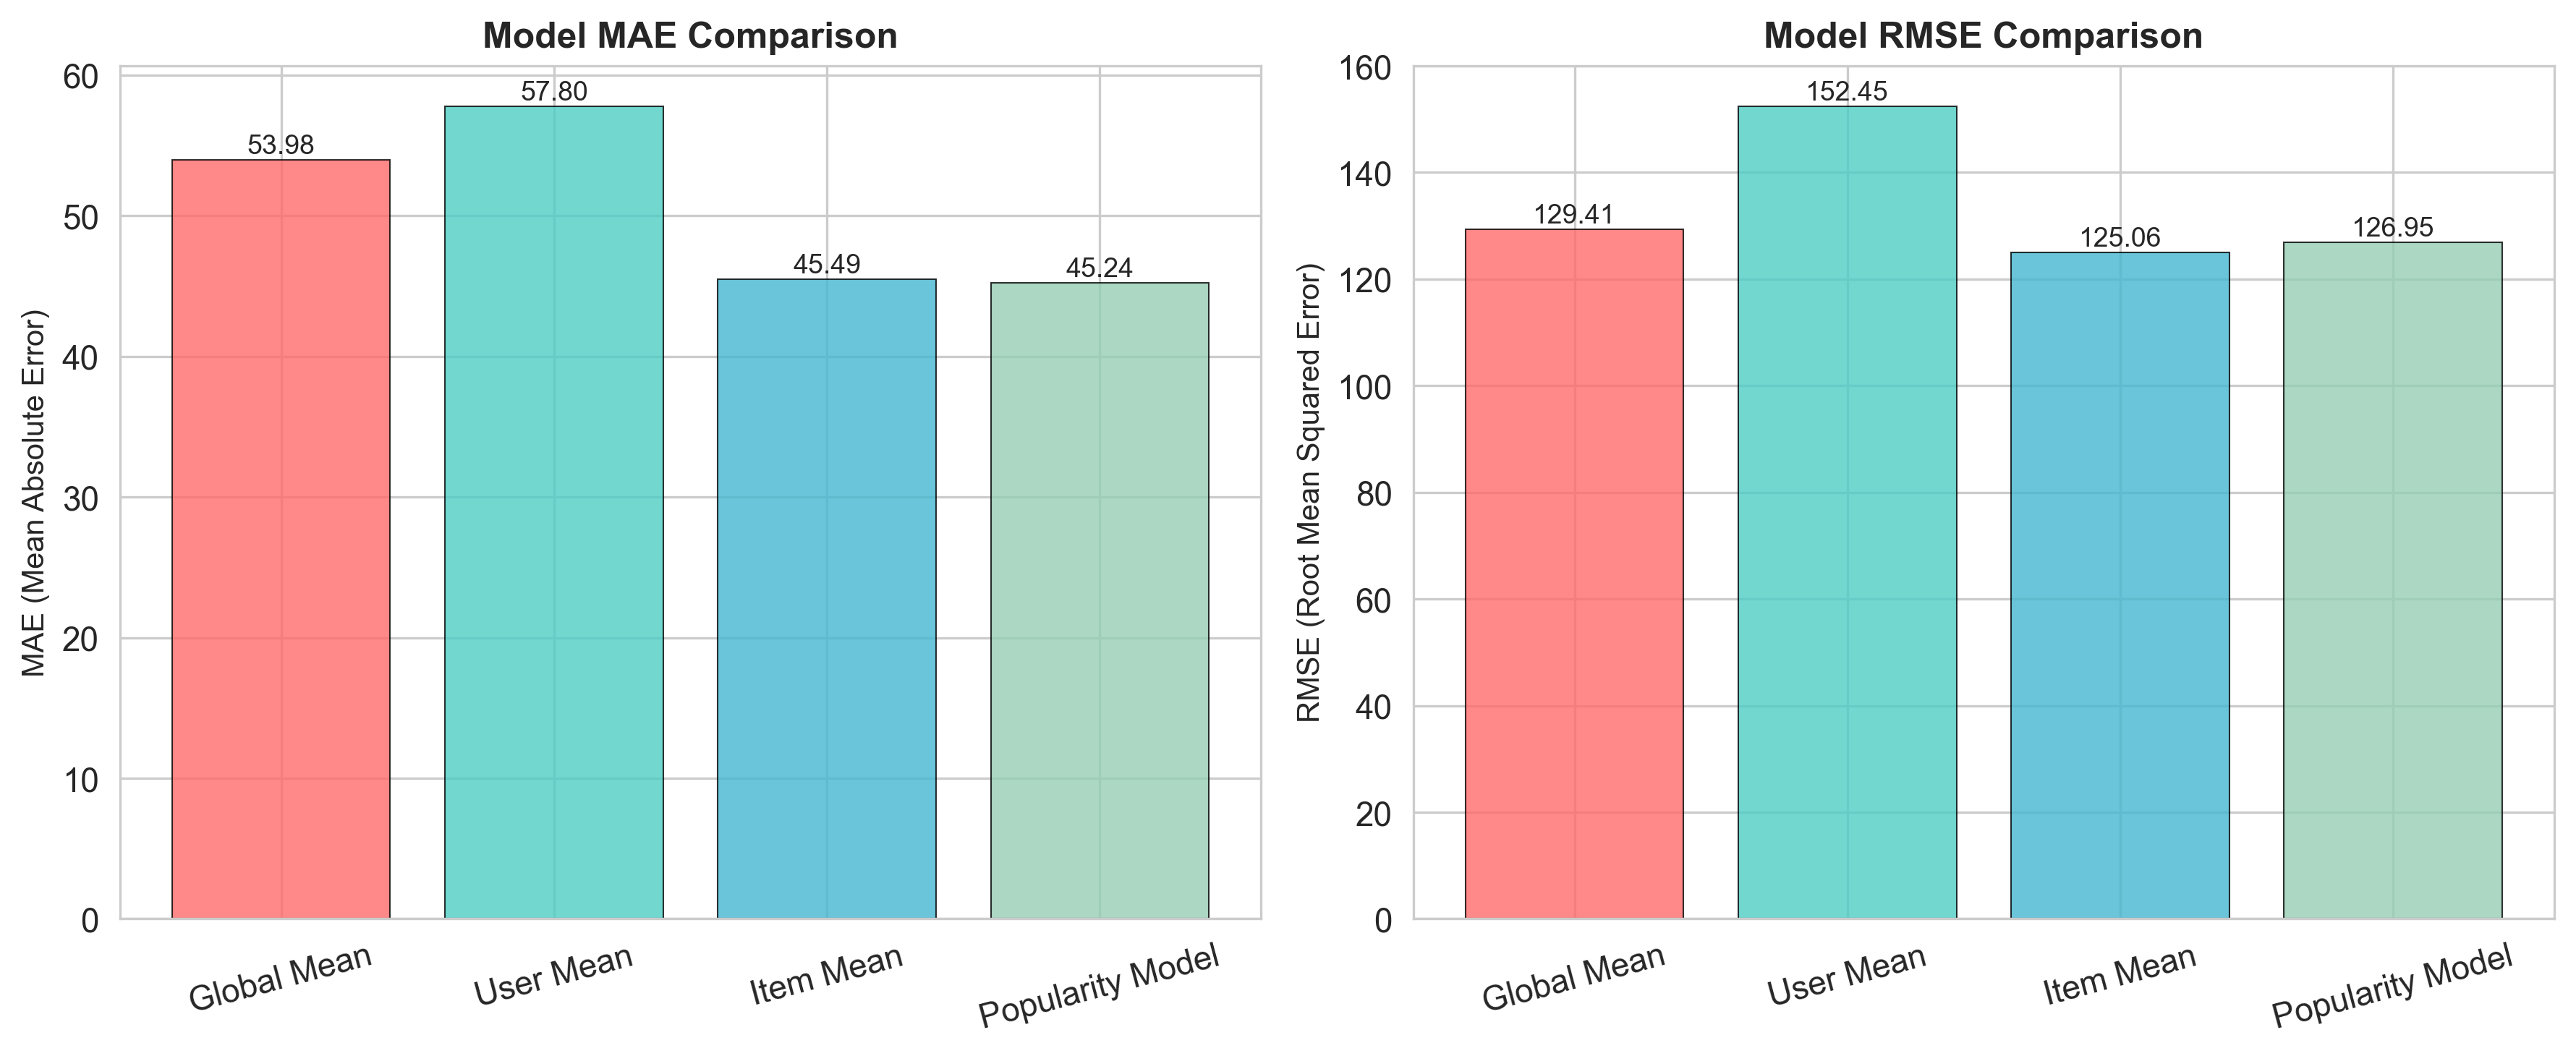

Comparison plot saved to: baseline_results\baseline_comparison.png

                    BASELINE MODELS IMPLEMENTATION COMPLETE                     


In [17]:
## Baseline Models Implementation
print("\n" + "=" * 80)
print("BASELINE MODELS IMPLEMENTATION".center(80))
print("=" * 80)

import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import os

# Ensure output directory exists
output_dir = 'baseline_results'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Data preprocessing: filter 'play' interactions and remove sparse entries
def preprocess_data(df, min_user_games=5, min_game_users=5):
    """
    Preprocess interaction data:
    1. Retain only 'play' behaviors.
    2. Filter users and items below activity thresholds.
    """
    print(f"Original dataset size: {len(df)} records")
    
    # Keep only 'play' interactions
    df_play = df[df['behavior-name'] == 'play'].copy()
    print(f"After filtering 'play': {len(df_play)} records")
    
    # Remove users with fewer than min_user_games played games
    user_counts = df_play['user-id'].value_counts()
    valid_users = user_counts[user_counts >= min_user_games].index
    df_filtered = df_play[df_play['user-id'].isin(valid_users)].copy()
    
    # Remove games with fewer than min_game_users unique players
    game_counts = df_filtered['game-title'].value_counts()
    valid_games = game_counts[game_counts >= min_game_users].index
    df_filtered = df_filtered[df_filtered['game-title'].isin(valid_games)].copy()
    
    print(f"After sparsity filtering: {len(df_filtered)} records")
    print(f"Remaining users: {df_filtered['user-id'].nunique()}")
    print(f"Remaining games: {df_filtered['game-title'].nunique()}")
    
    return df_filtered

# Apply preprocessing (fallback to df_play if df is undefined)
try:
    df_processed = preprocess_data(df, min_user_games=5, min_game_users=5)
except NameError:
    df_processed = preprocess_data(df_play, min_user_games=5, min_game_users=5)

# Train-test split by user (simulated temporal split via game-title ordering)
def train_test_split(df, test_size=0.2):
    """Split data per user, preserving sequential order."""
    train_data = []
    test_data = []
    
    for user_id, group in df.groupby('user-id'):
        group = group.sort_values('game-title')  # proxy for time
        split_idx = int(len(group) * (1 - test_size))
        train_data.append(group.iloc[:split_idx])
        test_data.append(group.iloc[split_idx:])
    
    train_df = pd.concat(train_data).reset_index(drop=True)
    test_df = pd.concat(test_data).reset_index(drop=True)
    
    print(f"Train set size: {len(train_df)} records")
    print(f"Test set size: {len(test_df)} records")
    return train_df, test_df

train_df, test_df = train_test_split(df_processed)

# Base class for baseline models
class BaselineModel:
    def __init__(self, name):
        self.name = name
        
    def fit(self, train_data):
        raise NotImplementedError("Subclasses must implement fit().")
        
    def predict(self, test_data):
        raise NotImplementedError("Subclasses must implement predict().")
        
    def evaluate(self, test_data):
        """Evaluate using MAE and RMSE."""
        y_true = test_data['value'].values
        y_pred = self.predict(test_data)
        mae = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        return {'model': self.name, 'MAE': mae, 'RMSE': rmse}

# Global Mean Baseline
class GlobalMeanModel(BaselineModel):
    def __init__(self):
        super().__init__("Global Mean")
        self.global_mean = None
        
    def fit(self, train_data):
        self.global_mean = train_data['value'].mean()
        print(f"{self.name} fitted — global mean: {self.global_mean:.2f} hours")
        
    def predict(self, test_data):
        return np.full(len(test_data), self.global_mean)

# User Mean Baseline
class UserMeanModel(BaselineModel):
    def __init__(self):
        super().__init__("User Mean")
        self.user_means = None
        self.global_mean = None
        
    def fit(self, train_data):
        self.user_means = train_data.groupby('user-id')['value'].mean().to_dict()
        self.global_mean = train_data['value'].mean()
        print(f"{self.name} fitted — {len(self.user_means)} users modeled")
        
    def predict(self, test_data):
        return np.array([
            self.user_means.get(uid, self.global_mean) 
            for uid in test_data['user-id']
        ])

# Item Mean Baseline
class ItemMeanModel(BaselineModel):
    def __init__(self):
        super().__init__("Item Mean")
        self.item_means = None
        self.global_mean = None
        
    def fit(self, train_data):
        self.item_means = train_data.groupby('game-title')['value'].mean().to_dict()
        self.global_mean = train_data['value'].mean()
        print(f"{self.name} fitted — {len(self.item_means)} games modeled")
        
    def predict(self, test_data):
        return np.array([
            self.item_means.get(game, self.global_mean) 
            for game in test_data['game-title']
        ])

# Popularity-Based Baseline (binned by total playtime)
class PopularityModel(BaselineModel):
    def __init__(self):
        super().__init__("Popularity Model")
        self.game_bin = {}
        self.popularity_bins = {}
        self.global_mean = None
        
    def fit(self, train_data):
        # Compute total playtime per game (popularity proxy)
        game_stats = train_data.groupby('game-title').agg({
            'value': ['mean', 'sum']
        })
        game_stats.columns = ['mean_hours', 'total_hours']
        game_stats = game_stats.sort_values('total_hours', ascending=False)
        
        # Assign games to decile bins by popularity
        game_stats['bin'] = pd.qcut(range(len(game_stats)), q=10, labels=range(10))
        self.popularity_bins = game_stats.groupby('bin', observed=False)['mean_hours'].mean().to_dict()
        self.game_bin = dict(zip(game_stats.index, game_stats['bin']))
        self.global_mean = train_data['value'].mean()
        
        print(f"{self.name} fitted — {len(self.popularity_bins)} popularity bins")
        
    def predict(self, test_data):
        preds = []
        for game in test_data['game-title']:
            if game in self.game_bin:
                bin_id = self.game_bin[game]
                preds.append(self.popularity_bins.get(bin_id, self.global_mean))
            else:
                preds.append(self.global_mean)
        return np.array(preds)

# Evaluate all baseline models
def evaluate_all_models(train_df, test_df):
    models = [
        GlobalMeanModel(),
        UserMeanModel(),
        ItemMeanModel(),
        PopularityModel()
    ]
    results = []
    
    for model in models:
        print(f"\n--- Training {model.name} ---")
        model.fit(train_df)
        print(f"--- Evaluating {model.name} ---")
        result = model.evaluate(test_df)
        results.append(result)
        print(f"MAE: {result['MAE']:.4f}")
        print(f"RMSE: {result['RMSE']:.4f}")
    
    return pd.DataFrame(results), models

results_df, models = evaluate_all_models(train_df, test_df)

# Display and save results
print("\n" + "=" * 80)
print("BASELINE MODELS EVALUATION RESULTS".center(80))
print("=" * 80)

print("\nResults (sorted by RMSE):")
print(results_df.sort_values('RMSE'))

# Save evaluation results to baseline_results
results_path = os.path.join(output_dir, 'baseline_evaluation.csv')
results_df.to_csv(results_path, index=False)
print(f"\nResults saved to: {results_path}")

# Generate summary report
summary_path = os.path.join(output_dir, 'baseline_summary.txt')
with open(summary_path, 'w') as f:
    f.write("Baseline Models Summary\n")
    f.write("======================\n\n")
    f.write("Data preprocessing:\n")
    orig_size = len(df) if 'df' in locals() else len(df_play)
    f.write(f"- Original records: {orig_size}\n")
    f.write(f"- After filtering: {len(df_processed)}\n\n")
    
    f.write("1. Model Performance\n")
    f.write("-------------------\n")
    for _, row in results_df.sort_values('RMSE').iterrows():
        f.write(f"- {row['model']}: MAE = {row['MAE']:.4f}, RMSE = {row['RMSE']:.4f}\n")
    
    f.write("\n2. Model Characteristics\n")
    f.write("------------------------\n")
    f.write("- Global Mean: Predicts global average playtime.\n")
    f.write("- User Mean: Uses per-user historical average.\n")
    f.write("- Item Mean: Uses per-game average playtime.\n")
    f.write("- Popularity Model: Groups games by total playtime deciles.\n")
    
    best = results_df.loc[results_df['RMSE'].idxmin()]
    f.write(f"\n3. Best Performing Model\n")
    f.write("-----------------------\n")
    f.write(f"{best['model']} achieves the lowest RMSE: {best['RMSE']:.4f}\n")

print(f"Summary saved to: {summary_path}")

# Visualize performance comparison
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
models_names = results_df['model'].values
mae_values = results_df['MAE'].values
rmse_values = results_df['RMSE'].values
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

# MAE plot
bars1 = ax1.bar(models_names, mae_values, color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
ax1.set_title('Model MAE Comparison', fontsize=12, fontweight='bold')
ax1.set_ylabel('MAE (Mean Absolute Error)', fontsize=10)
ax1.tick_params(axis='x', rotation=15)
for bar, val in zip(bars1, mae_values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{val:.2f}', ha='center', va='bottom', fontsize=9)

# RMSE plot
bars2 = ax2.bar(models_names, rmse_values, color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
ax2.set_title('Model RMSE Comparison', fontsize=12, fontweight='bold')
ax2.set_ylabel('RMSE (Root Mean Squared Error)', fontsize=10)
ax2.tick_params(axis='x', rotation=15)
for bar, val in zip(bars2, rmse_values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2, 
             f'{val:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'baseline_comparison.png'), bbox_inches='tight')
plt.show()

print(f"Comparison plot saved to: {os.path.join(output_dir, 'baseline_comparison.png')}")

print("\n" + "=" * 80)
print("BASELINE MODELS IMPLEMENTATION COMPLETE".center(80))
print("=" * 80)

**Baseline Models Summary**  

**Data Preprocessing**  
The dataset was filtered to retain only 'play' interactions (excluding 'purchase' behaviors) and remove sparse entries: users with fewer than 5 played games and games with fewer than 5 unique players were excluded. This reduced noise and focused on meaningful user-game interactions, resulting in a cleaned dataset with **54,017 records**, **2,435 unique users**, and **1,524 unique games** (down from the original 199,999 records).  

**Model Performance**  
Four baseline models were evaluated using MAE (Mean Absolute Error) and RMSE (Root Mean Squared Error):  

| Model              | MAE       | RMSE      |  
|--------------------|-----------|-----------|  
| Item Mean          | 45.49     | 125.06    |  
| Popularity Model   | 45.24     | 126.95    |  
| Global Mean        | 53.98     | 129.41    |  
| User Mean          | 57.80     | 152.45    |  

The **Item Mean model** achieved the best performance (lowest RMSE: 125.06), followed closely by the Popularity Model (RMSE: 126.95). The User Mean model performed poorest (RMSE: 152.45), indicating that game-specific patterns are more predictive of playtime than user-specific habits in this dataset.  

**Model Characteristics**  
- **Global Mean**: Predicts using the overall average playtime (44.94 hours) across all users and games. Simple but fails to capture individual preferences or game differences.  
- **User Mean**: Uses each user’s historical average playtime (modeled for 2,434 users). Underperforms here, suggesting user behavior is less consistent than game characteristics.  
- **Item Mean**: Leverages game-specific average playtime (modeled for 1,381 games). Outperforms other models, indicating playtime is strongly influenced by game-specific traits (e.g., engagement, content length).  
- **Popularity Model**: Groups games into 10 bins by total playtime (popularity) and predicts using bin averages. Performs nearly as well as Item Mean, balancing game-level trends and generalization.  

**Key Insight**  
Game-specific patterns (Item Mean, Popularity Model) are stronger predictors of playtime than user behavior or global averages. This suggests playtime is more influenced by inherent game characteristics than individual user habits, highlighting the value of item-level features for improving future models.  

